## Modelling of alanine using PySCF.
We perform geometry optimizations and frequency calculations on an alanine molecule. 

Note that, in order to use these calculations and to use PySCF, you need to use WSL. Install PySCF in WSL, as well as VSCode, and open VSCode from WSL. I think this "treats" the code as if it runs in Linux - so whereas normally, Windows can't install (and therefore not run) PySCF, your code will be able to run.

### I. Geometry Optimization

We begin by first initializing our molecular coordinates.

In [2]:
# set up the alanine molecule
import numpy
import scipy.linalg
from pyscf import gto, scf

# Set up H2 molecular geometry and basis
mol = gto.Mole()
mol.atom = '''
  H      2.1243     -0.0920      1.6298
  N      1.7374     -0.1422      0.7112
  H      2.0613      0.6335      0.1718
  C      0.2575     -0.1205      0.8106
  H     -0.0277     -1.0425      1.3783
  C     -0.3039      1.1050      1.5253
  H      0.0733      1.1716      2.5550
  H     -0.0396      2.0418      1.0151
  H     -1.3991      1.0613      1.5830
  C     -0.3219     -0.1861     -0.5965
  O     -0.0965      0.5316     -1.5533
  O     -1.2271     -1.1715     -0.7934
  H     -1.5376     -1.1552     -1.6934
'''
mol.unit = 'B'
mol.basis = 'sto-3g'

mol.build()

In [3]:
# See number of basis functions, overlap, kinetic, V_NE matrix sizes.
# help(gto.moleintor.getints)
s=mol.intor("int1e_ovlp_sph")
t=mol.intor("int1e_kin_sph")
vne=mol.intor("int1e_nuc_sph")

nao=mol.nao_nr()
print("Total number of basis fns:", nao)
print("Shape of overlap, kinetic, vne matrices", s.shape, t.shape, vne.shape)

Total number of basis fns: 37
Shape of overlap, kinetic, vne matrices (37, 37) (37, 37) (37, 37)


We define two functions to swap between .xyz and Mole() formats for atomic coordinates.

In [4]:
# Use this to save coordinates in Bohrs as an .xyz file in Avogadro.

def makeXYZ_bohr(mol_obj):
    coords = mol_obj.atom_coords()

    file_name = input("Enter the file name: ")

    # If the user canceled the input, stop further processing
    if not file_name:
        print("User canceled the input.")
    else:
        # Append the ".xyz" extension if not provided by the user
        if not file_name.endswith(".xyz"):
            file_name += ".xyz"

        # Your existing code for writing to the file
        with open(file_name, 'w') as f:
            num_atoms = len(coords)
            f.write(f"{num_atoms}\n")
            f.write("Generated by PySCF\n")  # Comment line
            for atom, coord in zip(mol_obj._atom, coords):
                atom_symbol = atom[0]
                f.write(f"{atom_symbol} {coord[0]:.6f} {coord[1]:.6f} {coord[2]:.6f}\n")

        print("File successfully written.")


In [5]:
makeXYZ_bohr(mol)

File successfully written.


In [6]:
# Use this to go backwards from .xyz to Mole() object

def getMole():

    from pyscf import gto
    import tkinter as tk
    from tkinter import filedialog

    # Create a Tkinter root window (it won't be shown, but is needed for the file dialog)
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    # Open a file dialog to choose the XYZ file
    xyz_file = filedialog.askopenfilename(title="Select XYZ File", filetypes=[("XYZ files", "*.xyz")])

    if xyz_file:
        # Read the XYZ file
        with open(xyz_file, 'r') as f:
            lines = f.readlines()

        # Extract atomic symbols and coordinates
        num_atoms = int(lines[0])
        atom_lines = lines[2:2+num_atoms]

        atoms = []
        coords = []

        for line in atom_lines:
            parts = line.split()
            atom_symbol = parts[0]
            x, y, z = map(float, parts[1:4])
            atoms.append(atom_symbol)
            coords.append([x, y, z])

        # Create a new Mole() object
        mol = gto.Mole()
        mol.atom = "\n".join(f"{atom} {x} {y} {z}" for atom, (x, y, z) in zip(atoms, coords))
        mol.unit = 'B'
        mol.basis = 'sto-3g'
        mol.build()

        return mol

        # Now you have a Mole() object with the atomic coordinates from the chosen XYZ file
    else:
        print("No file selected.")

We are now ready to perform a geometry optimization.

In [7]:
# Geometry optimization

from pyscf import scf
mf = scf.RHF(mol)

from pyscf.geomopt import optimize
mol_eq = optimize(mf, maxsteps = 200)
print(mol_eq.atom_coords())

/home/abalaji/.local/lib/python3.10/site-packages/pyscf/dft/libxc.py:772: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, the same to the B3LYP functional in Gaussian and ORCA (issue 1480). To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '
geometric-optimize called with the following command line:
/usr/lib/python3/dist-packages/ipykernel_launcher.py --ip=127.0.0.1 --stdin=9003 --control=9001 --hb=9000 --Session.signature_scheme="hmac-sha256" --Session.key=b"98233a52-5618-4d09-abb3-4f33c58f21ae" --shell=9002 --transport="tcp" --iopub=9004 --f=/home/abalaji/.local/share/jupyter/runtime/kernel-v2-608drr0PsdthGnk.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *))))))))))


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.124131  -0.048684   0.862453    0.000000  0.000000  0.000000
   N   0.919392  -0.075249   0.376351    0.000000  0.000000  0.000000
   H   1.090793   0.335234   0.090913   -0.000000  0.000000 -0.000000
   C   0.136263  -0.063766   0.428951    0.000000  0.000000  0.000000
   H  -0.014658  -0.551667   0.729365    0.000000  0.000000  0.000000
   C  -0.160817   0.584741   0.807154    0.000000  0.000000  0.000000
   H   0.038789   0.619984   1.352048    0.000000  0.000000  0.000000
   H  -0.020955   1.080474   0.537168    0.000000  0.000000  0.000000
   H  -0.740372   0.561616   0.837688    0.000000  0.000000  0.000000
   C  -0.170342  -0.098480  -0.315654    0.000000  0.000000  0.000000
   O  -0.051066   0.281311  -0.821971    0.000000  0.000000  0.000000
   O  -0.649353  -0.619931  -0.419849    0.000000  0.000000  0.000000
   H  -0.813663  -0.611306  -0.8

Step    0 : Gradient = 4.618e+00/1.104e+01 (rms/max) Energy = -301.9935850676
Hessian Eigenvalues: 2.52882e-02 2.53534e-02 2.57228e-02 ... 2.79247e+00 1.71630e+01 1.02769e+02



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.241176  -0.067236   0.953878    0.117045 -0.018552  0.091425
   N   0.987177  -0.098889   0.377551    0.067785 -0.023640  0.001200
   H   1.198512   0.389742   0.039521    0.107719  0.054508 -0.051392
   C   0.139600  -0.080108   0.438321    0.003337 -0.016343  0.009370
   H  -0.030263  -0.624265   0.773011   -0.015605 -0.072598  0.043646
   C  -0.178571   0.618773   0.843915   -0.017754  0.034032  0.036761
   H   0.044749   0.661689   1.460145    0.005961  0.041705  0.108097
   H  -0.018713   1.176673   0.538526    0.002243  0.096199  0.001358
   H  -0.832165   0.597797   0.880476   -0.091793  0.036182  0.042789
   C  -0.191485  -0.113023  -0.369820   -0.021143 -0.014543 -0.054166
   O  -0.054763   0.282560  -0.868226   -0.003698  0.001249 -0.046255
   O  -0.694076  -0.669333  -0.447510   -0.044722 -0.049402 -0.027661
   H  -0.923036  -0.680104  -1.0

Step    1 : Displace = 1.043e-01/2.019e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 3.903e+00/1.033e+01 (rms/max) E (change) = -306.7126364667 (-4.719e+00) Quality = 1.093
Hessian Eigenvalues: 2.52882e-02 2.53534e-02 2.57222e-02 ... 2.98925e+00 1.46198e+01 9.92179e+01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.427209  -0.099799   1.041944    0.186034 -0.032563  0.088065
   N   1.111054  -0.136411   0.369412    0.123876 -0.037522 -0.008139
   H   1.347294   0.439481  -0.022514    0.148782  0.049739 -0.062035
   C   0.144277  -0.108816   0.450645    0.004677 -0.028707  0.012324
   H  -0.050652  -0.745057   0.834659   -0.020388 -0.120792  0.061649
   C  -0.218926   0.684084   0.903003   -0.040355  0.065310  0.059088
   H   0.035324   0.743452   1.626330   -0.009425  0.081763  0.166186
   H  -0.028783   1.326651   0.543556   -0.010071  0.149978  0.005030
   H  -0.979341   0.662193   0.948951   -0.147176  0.064396  0.068475
   C  -0.237596  -0.146278  -0.467622   -0.046111 -0.033255 -0.097802
   O  -0.036879   0.304963  -0.922714    0.017885  0.022403 -0.054487
   O  -0.791759  -0.776250  -0.514149   -0.097683 -0.106917 -0.066639
   H  -1.033080  -0.753938  -1.2

Step    2 : Displace = 1.505e-01/2.169e-01 (rms/max) Trust = 1.414e-01 (+) Grad = 3.144e+00/8.797e+00 (rms/max) E (change) = -311.2123390429 (-4.500e+00) Quality = 1.256
Hessian Eigenvalues: 2.52876e-02 2.53520e-02 2.57039e-02 ... 2.95306e+00 1.37606e+01 9.68961e+01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.642468  -0.095113   1.152437    0.215258  0.004686  0.110493
   N   1.257753  -0.159660   0.361858    0.146700 -0.023249 -0.007554
   H   1.473167   0.532243  -0.085329    0.125873  0.092762 -0.062815
   C   0.156382  -0.145195   0.475332    0.012105 -0.036380  0.024687
   H  -0.062127  -0.894139   0.903150   -0.011476 -0.149082  0.068490
   C  -0.250785   0.764709   0.963596   -0.031860  0.080625  0.060593
   H   0.056398   0.855902   1.798940    0.021074  0.112450  0.172610
   H  -0.009319   1.481758   0.532612    0.019465  0.155106 -0.010944
   H  -1.123847   0.741228   1.022981   -0.144506  0.079035  0.074030
   C  -0.352621  -0.245184  -0.597705   -0.115025 -0.098906 -0.130083
   O   0.099408   0.388580  -0.821444    0.136287  0.083617  0.101270
   O  -0.972395  -0.951630  -0.647660   -0.180636 -0.175379 -0.133511
   H  -1.226340  -0.879222  -1.4

Step    3 : Displace = 2.021e-01/3.530e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 1.369e+00/3.899e+00 (rms/max) E (change) = -314.8925805637 (-3.680e+00) Quality = 1.267
Hessian Eigenvalues: 2.51995e-02 2.53412e-02 2.56191e-02 ... 2.94873e+00 1.34290e+01 9.57798e+01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.859906  -0.033380   1.182580    0.217439  0.061733  0.030144
   N   1.373404  -0.148133   0.316511    0.115651  0.011527 -0.045347
   H   1.607547   0.656762  -0.182404    0.134380  0.124519 -0.097075
   C   0.163657  -0.192195   0.469098    0.007275 -0.047000 -0.006235
   H  -0.076841  -1.069882   0.937542   -0.014713 -0.175743  0.034393
   C  -0.323450   0.846733   1.052526   -0.072665  0.082024  0.088930
   H   0.096100   1.015759   1.992917    0.039702  0.159857  0.193977
   H   0.000006   1.618694   0.566706    0.009325  0.136936  0.034094
   H  -1.288685   0.820878   1.137189   -0.164838  0.079650  0.114208
   C  -0.718290  -0.224592  -0.655134   -0.365669  0.020592 -0.057429
   O   0.579744   0.213103  -0.576101    0.480336 -0.175477  0.245343
   O  -0.959587  -1.165790  -0.983272    0.012808 -0.214160 -0.335612
   H  -1.625370  -0.943680  -1.6

Step    4 : Displace = 2.928e-01/5.775e-01 (rms/max) Trust = 2.828e-01 (+) Grad = 6.208e-01/1.155e+00 (rms/max) E (change) = -316.2204458573 (-1.328e+00) Quality = -2.894
Not rejecting step - energy decreases during minimization
Hessian Eigenvalues: 5.27918e-03 2.52829e-02 2.58354e-02 ... 2.92719e+00 1.29679e+01 9.12012e+01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.969905  -0.140929   1.209583    0.109999 -0.107549  0.027003
   N   1.448174  -0.240728   0.315215    0.074770 -0.092596 -0.001296
   H   1.781422   0.628142  -0.174057    0.173875 -0.028620  0.008347
   C   0.108710  -0.216042   0.472250   -0.054947 -0.023846  0.003152
   H  -0.085814  -1.128873   0.927810   -0.008973 -0.058990 -0.009732
   C  -0.375781   0.925534   1.109590   -0.052330  0.078802  0.057064
   H   0.096802   1.098813   2.069632    0.000702  0.083055  0.076715
   H  -0.064169   1.737344   0.606188   -0.064175  0.118650  0.039482
   H  -1.389497   0.900856   1.210239   -0.100812  0.079978  0.073050
   C  -0.738388  -0.166531  -0.623551   -0.020099  0.058061  0.031583
   O   0.403525   0.254708  -0.807678   -0.176219  0.041605 -0.231578
   O  -0.869711  -1.281791  -1.030213    0.089877 -0.116001 -0.046941
   H  -1.597038  -0.976228  -1.7

Step    5 : Displace = 1.416e-01/2.963e-01 (rms/max) Trust = 1.414e-01 (-) Grad = 2.412e-01/4.212e-01 (rms/max) E (change) = -317.0419952397 (-8.215e-01) Quality = 0.971
Hessian Eigenvalues: 5.29167e-03 2.53828e-02 2.59182e-02 ... 2.92664e+00 1.28166e+01 9.11812e+01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.081994  -0.243741   1.184432    0.112089 -0.102811 -0.025151
   N   1.517458  -0.306199   0.249931    0.069284 -0.065471 -0.065283
   H   1.908079   0.611332  -0.255008    0.126657 -0.016810 -0.080951
   C   0.052337  -0.205783   0.438538   -0.056373  0.010259 -0.033712
   H  -0.120539  -1.184761   0.888526   -0.034724 -0.055888 -0.039285
   C  -0.447630   1.016622   1.208258   -0.071849  0.091088  0.098668
   H   0.136844   1.224471   2.195457    0.040042  0.125657  0.125825
   H  -0.136210   1.884847   0.662835   -0.072041  0.147503  0.056647
   H  -1.495142   0.994779   1.354130   -0.105645  0.093924  0.143890
   C  -0.959640  -0.074633  -0.390476   -0.221252  0.091898  0.233076
   O   0.473969   0.110443  -0.849543    0.070444 -0.144265 -0.041865
   O  -0.711166  -1.325649  -1.351290    0.158545 -0.043858 -0.321077
   H  -1.612214  -1.107452  -1.7

Step    6 : Displace = 1.930e-01/3.625e-01 (rms/max) Trust = 2.000e-01 (+) Grad = 2.180e-01/4.243e-01 (rms/max) E (change) = -317.0331047530 (+8.890e-03) Quality = -0.041
Hessian Eigenvalues: 2.03471e-02 2.44396e-02 2.60967e-02 ... 2.92825e+00 1.27757e+01 9.11420e+01



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.124133  -0.205634   1.276487    0.042139  0.038107  0.092055
   N   1.594012  -0.290381   0.324101    0.076553  0.015818  0.074169
   H   1.979098   0.649103  -0.164026    0.071019  0.037771  0.090982
   C   0.076650  -0.232794   0.446829    0.024313 -0.027011  0.008291
   H  -0.109061  -1.200897   0.901698    0.011477 -0.016137  0.013173
   C  -0.416446   1.030177   1.229793    0.031183  0.013555  0.021535
   H   0.163725   1.234383   2.213336    0.026880  0.009912  0.017878
   H  -0.100058   1.916698   0.663451    0.036152  0.031852  0.000617
   H  -1.502073   1.011942   1.374433   -0.006931  0.017163  0.020303
   C  -0.968837  -0.139441  -0.533418   -0.009197 -0.064808 -0.142942
   O   0.367675   0.167479  -0.917238   -0.106294  0.057036 -0.067695
   O  -0.815526  -1.383928  -1.371341   -0.104360 -0.058279 -0.020051
   H  -1.705149  -1.162430  -1.8

Step    7 : Displace = 9.884e-02/1.537e-01 (rms/max) Trust = 9.650e-02 (-) Grad = 1.456e-01/2.930e-01 (rms/max) E (change) = -317.2780460217 (-2.449e-01) Quality = 0.981
Hessian Eigenvalues: 2.31322e-02 2.43744e-02 2.60969e-02 ... 2.92936e+00 1.27695e+01 9.11229e+01



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.169803  -0.167986   1.397996    0.045670  0.037648  0.121509
   N   1.704901  -0.270655   0.434938    0.110889  0.019726  0.110837
   H   1.982090   0.685671  -0.065645    0.002992  0.036569  0.098382
   C   0.132477  -0.249562   0.464808    0.055827 -0.016768  0.017979
   H  -0.074866  -1.208079   0.918752    0.034195 -0.007182  0.017053
   C  -0.366548   1.046845   1.253245    0.049898  0.016668  0.023452
   H   0.198799   1.226852   2.221921    0.035074 -0.007531  0.008585
   H  -0.057424   1.944935   0.647359    0.042634  0.028236 -0.016092
   H  -1.485909   1.041852   1.398250    0.016163  0.029910  0.023817
   C  -0.969556  -0.225100  -0.690937   -0.000719 -0.085659 -0.157519
   O   0.208887   0.231171  -0.972062   -0.158788  0.063692 -0.054824
   O  -0.994665  -1.405743  -1.393244   -0.179140 -0.021815 -0.021902
   H  -1.759845  -1.255924  -2.0

Step    8 : Displace = 1.259e-01/1.985e-01 (rms/max) Trust = 1.365e-01 (+) Grad = 8.747e-02/2.066e-01 (rms/max) E (change) = -317.4354572658 (-1.574e-01) Quality = 1.120
Hessian Eigenvalues: 2.22748e-02 2.48385e-02 2.60696e-02 ... 2.92945e+00 1.27799e+01 9.11205e+01



Geometry optimization cycle 10
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.172604  -0.141179   1.453776    0.002802  0.026808  0.055780
   N   1.752446  -0.244888   0.472067    0.047546  0.025766  0.037130
   H   2.030986   0.710162  -0.009688    0.048895  0.024491  0.055957
   C   0.159179  -0.249392   0.455065    0.026702  0.000170 -0.009743
   H  -0.071257  -1.211963   0.901135    0.003609 -0.003884 -0.017617
   C  -0.346772   1.049744   1.262951    0.019775  0.002899  0.009706
   H   0.218990   1.227104   2.223132    0.020191  0.000252  0.001211
   H  -0.043142   1.951993   0.639759    0.014282  0.007058 -0.007601
   H  -1.472912   1.048868   1.412785    0.012997  0.007016  0.014535
   C  -1.011217  -0.267680  -0.741500   -0.041661 -0.042580 -0.050563
   O   0.172607   0.237990  -0.970086   -0.036280  0.006819  0.001976
   O  -1.058075  -1.427223  -1.435724   -0.063410 -0.021480 -0.042480
   H  -1.815295  -1.289260  -2.

Step    9 : Displace = 5.354e-02/8.143e-02 (rms/max) Trust = 1.930e-01 (+) Grad = 8.205e-02/2.045e-01 (rms/max) E (change) = -317.4622435031 (-2.679e-02) Quality = 1.674
Hessian Eigenvalues: 1.13010e-02 2.41025e-02 2.52328e-02 ... 2.92938e+00 1.27373e+01 9.10842e+01



Geometry optimization cycle 11
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.147596  -0.057221   1.589857   -0.025008  0.083957  0.136081
   N   1.877594  -0.153099   0.569046    0.125147  0.091790  0.096979
   H   2.179731   0.783386   0.156185    0.148746  0.073224  0.165873
   C   0.240383  -0.235119   0.413440    0.081204  0.014273 -0.041625
   H  -0.076071  -1.210239   0.822235   -0.004814  0.001725 -0.078900
   C  -0.289105   1.051670   1.280757    0.057667  0.001926  0.017805
   H   0.277010   1.208631   2.219956    0.058020 -0.018473 -0.003175
   H  -0.003432   1.962067   0.625697    0.039710  0.010074 -0.014062
   H  -1.422084   1.062344   1.446223    0.050829  0.013476  0.033438
   C  -1.148571  -0.391043  -0.867159   -0.137355 -0.123362 -0.125658
   O   0.103185   0.227716  -0.935604   -0.069422 -0.010274  0.034482
   O  -1.224945  -1.485073  -1.557187   -0.166870 -0.057850 -0.121463
   H  -1.973149  -1.369745  -2.

Step   10 : Displace = 1.482e-01/2.305e-01 (rms/max) Trust = 2.729e-01 (+) Grad = 8.467e-02/2.163e-01 (rms/max) E (change) = -317.5048870584 (-4.264e-02) Quality = 1.186
Hessian Eigenvalues: 9.47278e-03 2.39383e-02 2.51743e-02 ... 2.93421e+00 1.27152e+01 9.10964e+01



Geometry optimization cycle 12
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.141060  -0.042095   1.611811   -0.006536  0.015126  0.021954
   N   1.910682  -0.139522   0.584093    0.033088  0.013577  0.015047
   H   2.213948   0.790984   0.183956    0.034217  0.007598  0.027770
   C   0.264739  -0.224062   0.401403    0.024356  0.011056 -0.012037
   H  -0.087461  -1.203095   0.793381   -0.011390  0.007144 -0.028855
   C  -0.280755   1.058388   1.286042    0.008350  0.006718  0.005285
   H   0.280088   1.201641   2.227251    0.003078 -0.006990  0.007295
   H  -0.004282   1.970155   0.634659   -0.000851  0.008088  0.008962
   H  -1.408441   1.068856   1.456099    0.013642  0.006512  0.009876
   C  -1.185024  -0.411271  -0.883998   -0.036453 -0.020228 -0.016840
   O   0.095154   0.213134  -0.932837   -0.008031 -0.014583  0.002767
   O  -1.244349  -1.503637  -1.588671   -0.019404 -0.018564 -0.031485
   H  -2.007215  -1.385200  -2.

Step   11 : Displace = 3.083e-02/4.517e-02 (rms/max) Trust = 3.000e-01 (+) Grad = 8.062e-02/2.100e-01 (rms/max) E (change) = -317.5162294880 (-1.134e-02) Quality = 1.704
Hessian Eigenvalues: 6.64390e-03 2.15051e-02 2.50379e-02 ... 2.91492e+00 1.24712e+01 9.10934e+01



Geometry optimization cycle 13
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.130489  -0.013523   1.636791   -0.010571  0.028572  0.024980
   N   1.985602  -0.141096   0.596575    0.074921 -0.001574  0.012482
   H   2.277785   0.772090   0.209331    0.063837 -0.018894  0.025375
   C   0.337699  -0.187649   0.377115    0.072960  0.036413 -0.024288
   H  -0.129249  -1.167479   0.714179   -0.041788  0.035615 -0.079202
   C  -0.279814   1.083624   1.290755    0.000941  0.025236  0.004713
   H   0.247017   1.175555   2.254798   -0.033071 -0.026086  0.027547
   H  -0.037059   1.991823   0.679448   -0.032776  0.021668  0.044789
   H  -1.377075   1.076228   1.461611    0.031366  0.007372  0.005511
   C  -1.255112  -0.417301  -0.892556   -0.070087 -0.006030 -0.008557
   O   0.101289   0.164712  -0.944753    0.006135 -0.048422 -0.011916
   O  -1.224391  -1.551685  -1.635704    0.019958 -0.048049 -0.047033
   H  -2.089040  -1.391022  -2.

Step   12 : Displace = 6.587e-02/9.489e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 6.547e-02/1.691e-01 (rms/max) E (change) = -317.5403182452 (-2.409e-02) Quality = 1.066
Hessian Eigenvalues: 7.45609e-03 1.99684e-02 2.51979e-02 ... 2.92244e+00 1.24397e+01 9.10896e+01



Geometry optimization cycle 14
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.154422  -0.017253   1.616910    0.023933 -0.003730 -0.019881
   N   1.972942  -0.159360   0.583467   -0.012661 -0.018264 -0.013108
   H   2.249642   0.754032   0.181679   -0.028142 -0.018058 -0.027652
   C   0.342426  -0.177187   0.394144    0.004727  0.010462  0.017030
   H  -0.127523  -1.159227   0.728244    0.001726  0.008252  0.014065
   C  -0.287545   1.091594   1.285031   -0.007731  0.007970 -0.005724
   H   0.223247   1.167073   2.255490   -0.023770 -0.008482  0.000692
   H  -0.054949   1.990936   0.694811   -0.017891 -0.000887  0.015363
   H  -1.371658   1.069686   1.450468    0.005418 -0.006543 -0.011142
   C  -1.237830  -0.408708  -0.863233    0.017282  0.008593  0.029323
   O   0.115022   0.153795  -0.955681    0.013733 -0.010917 -0.010928
   O  -1.232578  -1.525652  -1.640895   -0.008187  0.026033 -0.005191
   H  -2.057476  -1.385453  -2.

Step   13 : Displace = 2.690e-02/4.204e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 5.577e-02/1.453e-01 (rms/max) E (change) = -317.5512101897 (-1.089e-02) Quality = 1.469
Hessian Eigenvalues: 6.53046e-03 1.51908e-02 2.52486e-02 ... 3.07355e+00 1.24373e+01 9.11037e+01



Geometry optimization cycle 15
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.160253  -0.010720   1.599223    0.005830  0.006533 -0.017687
   N   1.964541  -0.179220   0.582558   -0.008401 -0.019861 -0.000909
   H   2.211389   0.720589   0.162558   -0.038253 -0.033444 -0.019120
   C   0.380136  -0.143321   0.413933    0.037710  0.033866  0.019789
   H  -0.116538  -1.122310   0.722576    0.010985  0.036917 -0.005668
   C  -0.287640   1.103638   1.268513   -0.000095  0.012044 -0.016518
   H   0.174171   1.134975   2.252645   -0.049076 -0.032098 -0.002846
   H  -0.083066   1.987474   0.735847   -0.028117 -0.003462  0.041036
   H  -1.341665   1.036392   1.406931    0.029993 -0.033293 -0.043537
   C  -1.210828  -0.399531  -0.858037    0.027002  0.009177  0.005195
   O   0.140243   0.134528  -0.977424    0.025221 -0.019267 -0.021742
   O  -1.233857  -1.498504  -1.625652   -0.001279  0.027148  0.015243
   H  -2.068997  -1.369713  -2.

Step   14 : Displace = 4.317e-02/6.325e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 4.853e-02/8.676e-02 (rms/max) E (change) = -317.5645537592 (-1.334e-02) Quality = 1.246
Hessian Eigenvalues: 6.39770e-03 1.42075e-02 2.55341e-02 ... 3.04415e+00 1.24425e+01 9.10866e+01



Geometry optimization cycle 16
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.141986  -0.008804   1.599389   -0.018267  0.001916  0.000166
   N   1.953847  -0.183516   0.589697   -0.010694 -0.004296  0.007139
   H   2.200248   0.708400   0.160723   -0.011141 -0.012189 -0.001836
   C   0.389037  -0.126884   0.421589    0.008901  0.016436  0.007656
   H  -0.095285  -1.099040   0.725875    0.021253  0.023269  0.003299
   C  -0.276963   1.106490   1.265643    0.010676  0.002852 -0.002870
   H   0.162969   1.129506   2.252162   -0.011202 -0.005468 -0.000483
   H  -0.082240   1.992057   0.755059    0.000827  0.004583  0.019212
   H  -1.324344   1.007200   1.383620    0.017321 -0.029193 -0.023311
   C  -1.197939  -0.401404  -0.864985    0.012889 -0.001874 -0.006947
   O   0.139381   0.133730  -0.984284   -0.000863 -0.000798 -0.006860
   O  -1.236546  -1.486752  -1.630428   -0.002689  0.011753 -0.004776
   H  -2.086009  -1.376705  -2.

Step   15 : Displace = 2.043e-02/4.081e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 4.785e-02/8.035e-02 (rms/max) E (change) = -317.5711174065 (-6.564e-03) Quality = 1.637
Hessian Eigenvalues: 4.68099e-03 1.27684e-02 2.30050e-02 ... 2.95431e+00 1.24342e+01 9.10044e+01



Geometry optimization cycle 17
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.081591   0.007603   1.614398   -0.060395  0.016407  0.015009
   N   1.935851  -0.185247   0.615369   -0.017997 -0.001731  0.025672
   H   2.213229   0.683604   0.172202    0.012981 -0.024796  0.011479
   C   0.410732  -0.085154   0.431442    0.021695  0.041730  0.009853
   H  -0.040717  -1.032497   0.730632    0.054567  0.066543  0.004758
   C  -0.240069   1.112346   1.270069    0.036895  0.005856  0.004426
   H   0.149506   1.125707   2.262916   -0.013463 -0.003799  0.010754
   H  -0.068159   2.017105   0.804696    0.014081  0.025049  0.049636
   H  -1.275198   0.927038   1.331393    0.049146 -0.080161 -0.052227
   C  -1.194468  -0.417982  -0.881208    0.003470 -0.016578 -0.016223
   O   0.123050   0.131118  -0.992756   -0.016330 -0.002612 -0.008472
   O  -1.259544  -1.463436  -1.690065   -0.022998  0.023316 -0.059637
   H  -2.147661  -1.425929  -2.

Step   16 : Displace = 5.814e-02/1.061e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 4.543e-02/7.552e-02 (rms/max) E (change) = -317.5852883209 (-1.417e-02) Quality = 1.386
Hessian Eigenvalues: 3.61793e-03 1.17001e-02 1.96448e-02 ... 2.93564e+00 1.24120e+01 9.09752e+01



Geometry optimization cycle 18
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.022445   0.032538   1.636355   -0.059145  0.024935  0.021958
   N   1.932705  -0.178900   0.639722   -0.003145  0.006346  0.024353
   H   2.264287   0.669005   0.194359    0.051058 -0.014599  0.022157
   C   0.428683  -0.057010   0.427828    0.017951  0.028144 -0.003614
   H   0.000308  -0.981699   0.732640    0.041025  0.050798  0.002008
   C  -0.209765   1.110026   1.281763    0.030304 -0.002320  0.011694
   H   0.149534   1.125732   2.280783    0.000028  0.000025  0.017867
   H  -0.052011   2.044948   0.838589    0.016148  0.027842  0.033894
   H  -1.240898   0.867939   1.296908    0.034300 -0.059099 -0.034485
   C  -1.209196  -0.434977  -0.897989   -0.014728 -0.016995 -0.016782
   O   0.102919   0.128325  -0.996354   -0.020131 -0.002792 -0.003598
   O  -1.282109  -1.451207  -1.764081   -0.022565  0.012229 -0.074017
   H  -2.218761  -1.480443  -2.

Step   17 : Displace = 5.453e-02/9.258e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 3.946e-02/5.976e-02 (rms/max) E (change) = -317.5945539175 (-9.266e-03) Quality = 1.348
Hessian Eigenvalues: 3.06564e-03 1.07722e-02 1.85475e-02 ... 2.97075e+00 1.24010e+01 9.09377e+01



Geometry optimization cycle 19
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.011782   0.039230   1.641986   -0.010663  0.006693  0.005630
   N   1.926913  -0.173925   0.644263   -0.005793  0.004975  0.004541
   H   2.312242   0.660489   0.200487    0.047955 -0.008516  0.006128
   C   0.437143  -0.033320   0.426797    0.008460  0.023691 -0.001031
   H   0.021375  -0.952959   0.747129    0.021067  0.028741  0.014489
   C  -0.200013   1.109180   1.294925    0.009751 -0.000846  0.013162
   H   0.147348   1.120926   2.300797   -0.002187 -0.004806  0.020014
   H  -0.052545   2.070407   0.858381   -0.000534  0.025459  0.019791
   H  -1.233976   0.848249   1.289384    0.006922 -0.019690 -0.007524
   C  -1.220519  -0.456884  -0.899065   -0.011323 -0.021907 -0.001076
   O   0.102218   0.125787  -0.999240   -0.000702 -0.002538 -0.002886
   O  -1.315732  -1.431160  -1.834053   -0.033623  0.020047 -0.069972
   H  -2.248094  -1.531745  -2.

Step   18 : Displace = 3.660e-02/7.864e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 3.576e-02/6.188e-02 (rms/max) E (change) = -317.5998667953 (-5.313e-03) Quality = 1.283
Hessian Eigenvalues: 3.23935e-03 8.88135e-03 1.63056e-02 ... 3.03262e+00 1.24520e+01 9.09102e+01



Geometry optimization cycle 20
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.978584   0.066126   1.660955   -0.033199  0.026895  0.018970
   N   1.938085  -0.163055   0.650537    0.011173  0.010871  0.006274
   H   2.408588   0.652096   0.220750    0.096346 -0.008393  0.020264
   C   0.442709  -0.033138   0.404136    0.005566  0.000181 -0.022661
   H   0.032733  -0.944478   0.759571    0.011358  0.008481  0.012442
   C  -0.200963   1.092620   1.307900   -0.000949 -0.016560  0.012975
   H   0.163727   1.104606   2.319771    0.016379 -0.016320  0.018975
   H  -0.051236   2.093403   0.853621    0.001308  0.022995 -0.004760
   H  -1.261377   0.857869   1.303017   -0.027401  0.009621  0.013634
   C  -1.235432  -0.454896  -0.911247   -0.014913  0.001988 -0.012182
   O   0.092042   0.121450  -1.009624   -0.010176 -0.004337 -0.010384
   O  -1.293180  -1.428427  -1.908069    0.022552  0.002733 -0.074015
   H  -2.326138  -1.569900  -2.

Step   19 : Displace = 4.852e-02/9.836e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 4.304e-02/6.908e-02 (rms/max) E (change) = -317.5989931086 (+8.737e-04) Quality = -0.141
Hessian Eigenvalues: 2.98938e-03 8.16440e-03 1.73497e-02 ... 3.34132e+00 1.24413e+01 9.08618e+01



Geometry optimization cycle 21
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.003243   0.043100   1.650052    0.024660 -0.023026 -0.010903
   N   1.927406  -0.159356   0.642384   -0.010679  0.003699 -0.008152
   H   2.394342   0.658356   0.208400   -0.014246  0.006260 -0.012350
   C   0.440818  -0.017947   0.415512   -0.001890  0.015192  0.011375
   H   0.031261  -0.943706   0.773224   -0.001472  0.000772  0.013654
   C  -0.205325   1.098800   1.311052   -0.004363  0.006180  0.003152
   H   0.163167   1.099689   2.322690   -0.000559 -0.004917  0.002918
   H  -0.059250   2.097107   0.861261   -0.008014  0.003704  0.007640
   H  -1.265081   0.871727   1.313837   -0.003704  0.013857  0.010819
   C  -1.228216  -0.476911  -0.913731    0.007217 -0.022015 -0.002485
   O   0.102188   0.124220  -1.011716    0.010146  0.002770 -0.002092
   O  -1.330426  -1.414304  -1.905770   -0.037246  0.014123  0.002299
   H  -2.285987  -1.586499  -2.

Step   20 : Displace = 2.349e-02/4.491e-02 (rms/max) Trust = 2.426e-02 (-) Grad = 3.152e-02/7.050e-02 (rms/max) E (change) = -317.6056187834 (-6.626e-03) Quality = 0.874
Hessian Eigenvalues: 3.00205e-03 8.20397e-03 1.73604e-02 ... 3.28015e+00 1.24150e+01 9.08962e+01



Geometry optimization cycle 22
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.004294   0.040059   1.646956    0.001051 -0.003041 -0.003097
   N   1.925659  -0.158059   0.638414   -0.001747  0.001297 -0.003970
   H   2.375587   0.661908   0.201675   -0.018755  0.003552 -0.006725
   C   0.439865  -0.022793   0.417115   -0.000954 -0.004846  0.001604
   H   0.021103  -0.954330   0.771285   -0.010158 -0.010624 -0.001939
   C  -0.212286   1.100717   1.303026   -0.006961  0.001918 -0.008026
   H   0.167659   1.085207   2.312521    0.004491 -0.014483 -0.010169
   H  -0.061897   2.087407   0.859283   -0.002647 -0.009700 -0.001978
   H  -1.271514   0.892556   1.321642   -0.006433  0.020829  0.007805
   C  -1.220518  -0.471045  -0.913760    0.007697  0.005865 -0.000029
   O   0.106740   0.121337  -1.015497    0.004551 -0.002883 -0.003782
   O  -1.312439  -1.417930  -1.884999    0.017987 -0.003626  0.020771
   H  -2.274110  -1.570758  -2.

Step   21 : Displace = 1.561e-02/2.736e-02 (rms/max) Trust = 3.431e-02 (+) Grad = 2.758e-02/6.901e-02 (rms/max) E (change) = -317.6074287823 (-1.810e-03) Quality = 1.446
Hessian Eigenvalues: 4.15520e-03 8.46045e-03 1.30695e-02 ... 3.31320e+00 1.23153e+01 9.05747e+01



Geometry optimization cycle 23
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.984460   0.042691   1.649655   -0.019834  0.002631  0.002699
   N   1.918826  -0.142717   0.636434   -0.006833  0.015341 -0.001980
   H   2.377993   0.669462   0.197983    0.002405  0.007554 -0.003692
   C   0.441858  -0.018086   0.413565    0.001993  0.004708 -0.003550
   H   0.015583  -0.959072   0.778954   -0.005520 -0.004743  0.007669
   C  -0.219203   1.101157   1.295297   -0.006917  0.000440 -0.007729
   H   0.191005   1.038261   2.300180    0.023346 -0.046946 -0.012340
   H  -0.063822   2.087715   0.870805   -0.001925  0.000308  0.011522
   H  -1.286057   0.934285   1.340855   -0.014543  0.041729  0.019213
   C  -1.207594  -0.480518  -0.921038    0.012924 -0.009472 -0.007277
   O   0.110064   0.110464  -1.028928    0.003325 -0.010873 -0.013430
   O  -1.307753  -1.406144  -1.898504    0.004687  0.011786 -0.013505
   H  -2.267218  -1.583222  -2.

Step   22 : Displace = 2.481e-02/5.275e-02 (rms/max) Trust = 4.852e-02 (+) Grad = 2.409e-02/6.818e-02 (rms/max) E (change) = -317.6099509316 (-2.522e-03) Quality = 1.328
Hessian Eigenvalues: 3.73162e-03 5.67827e-03 1.39339e-02 ... 3.30521e+00 1.22944e+01 9.03911e+01



Geometry optimization cycle 24
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.966758   0.043193   1.656671   -0.017701  0.000502  0.007016
   N   1.902709  -0.127949   0.639710   -0.016117  0.014769  0.003276
   H   2.374473   0.680062   0.200948   -0.003519  0.010600  0.002965
   C   0.436606  -0.014752   0.406991   -0.005252  0.003334 -0.006574
   H   0.019510  -0.959603   0.787192    0.003927 -0.000530  0.008238
   C  -0.219474   1.100151   1.292037   -0.000271 -0.001007 -0.003260
   H   0.215495   1.004975   2.288596    0.024490 -0.033286 -0.011584
   H  -0.053371   2.093877   0.884091    0.010451  0.006162  0.013286
   H  -1.293981   0.961745   1.353897   -0.007924  0.027460  0.013042
   C  -1.198609  -0.491402  -0.931123    0.008986 -0.010884 -0.010086
   O   0.109439   0.104904  -1.038676   -0.000625 -0.005560 -0.009748
   O  -1.304975  -1.396454  -1.921352    0.002777  0.009690 -0.022848
   H  -2.266440  -1.604472  -2.

Step   23 : Displace = 2.154e-02/4.252e-02 (rms/max) Trust = 6.862e-02 (+) Grad = 2.267e-02/6.693e-02 (rms/max) E (change) = -317.6111728500 (-1.222e-03) Quality = 1.344
Hessian Eigenvalues: 2.91738e-03 5.54611e-03 1.37939e-02 ... 3.30954e+00 1.22839e+01 8.99480e+01



Geometry optimization cycle 25
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.946778   0.050174   1.666580   -0.019980  0.006981  0.009909
   N   1.893562  -0.112964   0.648246   -0.009147  0.014985  0.008537
   H   2.366838   0.694858   0.211745   -0.007635  0.014796  0.010797
   C   0.433899  -0.013763   0.399310   -0.002707  0.000989 -0.007681
   H   0.023432  -0.958189   0.786834    0.003922  0.001414 -0.000358
   C  -0.212905   1.099820   1.289102    0.006570 -0.000331 -0.002935
   H   0.234966   0.983594   2.279143    0.019471 -0.021381 -0.009453
   H  -0.032976   2.097225   0.896412    0.020395  0.003347  0.012321
   H  -1.290746   0.974301   1.360534    0.003235  0.012556  0.006637
   C  -1.196250  -0.504323  -0.938985    0.002359 -0.012921 -0.007862
   O   0.103915   0.097515  -1.042770   -0.005524 -0.007390 -0.004095
   O  -1.314527  -1.390549  -1.946388   -0.009552  0.005904 -0.025035
   H  -2.267844  -1.623422  -2.

Step   24 : Displace = 1.897e-02/3.024e-02 (rms/max) Trust = 9.704e-02 (+) Grad = 2.196e-02/6.251e-02 (rms/max) E (change) = -317.6119299245 (-7.571e-04) Quality = 1.364
Hessian Eigenvalues: 2.94127e-03 5.13700e-03 1.35979e-02 ... 3.38169e+00 1.22913e+01 8.92908e+01



Geometry optimization cycle 26
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.927158   0.054844   1.679795   -0.019620  0.004670  0.013215
   N   1.878241  -0.096327   0.659424   -0.015321  0.016637  0.011177
   H   2.340241   0.719321   0.228558   -0.026597  0.024463  0.016813
   C   0.424207  -0.020501   0.388541   -0.009692 -0.006738 -0.010769
   H   0.026420  -0.962978   0.782292    0.002988 -0.004789 -0.004541
   C  -0.204148   1.098449   1.283918    0.008756 -0.001370 -0.005184
   H   0.255413   0.969129   2.264943    0.020447 -0.014465 -0.014201
   H   0.006205   2.095416   0.906027    0.039181 -0.001809  0.009615
   H  -1.284463   0.987488   1.366223    0.006284  0.013187  0.005689
   C  -1.198891  -0.511920  -0.951016   -0.002641 -0.007597 -0.012031
   O   0.096622   0.093502  -1.043994   -0.007293 -0.004012 -0.001223
   O  -1.302541  -1.394523  -1.965943    0.011986 -0.003973 -0.019556
   H  -2.276321  -1.637625  -2.

Step   25 : Displace = 2.339e-02/4.172e-02 (rms/max) Trust = 1.372e-01 (+) Grad = 2.100e-02/5.675e-02 (rms/max) E (change) = -317.6123552343 (-4.253e-04) Quality = 0.568
Hessian Eigenvalues: 2.68214e-03 6.14425e-03 1.29690e-02 ... 3.84612e+00 1.22742e+01 8.88550e+01



Geometry optimization cycle 27
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.921178   0.058384   1.680522   -0.005980  0.003540  0.000727
   N   1.885356  -0.093549   0.660771    0.007115  0.002778  0.001348
   H   2.342569   0.725021   0.233768    0.002328  0.005700  0.005211
   C   0.429036  -0.019482   0.387250    0.004830  0.001018 -0.001290
   H   0.029148  -0.961626   0.778805    0.002728  0.001352 -0.003488
   C  -0.201508   1.098587   1.283543    0.002640  0.000137 -0.000375
   H   0.250118   0.971661   2.268015   -0.005295  0.002532  0.003073
   H   0.014042   2.094679   0.908469    0.007837 -0.000737  0.002442
   H  -1.279259   0.981282   1.363761    0.005204 -0.006206 -0.002463
   C  -1.201596  -0.517037  -0.948163   -0.002706 -0.005117  0.002853
   O   0.095840   0.088639  -1.043420   -0.000781 -0.004863  0.000573
   O  -1.320775  -1.389700  -1.976185   -0.018234  0.004823 -0.010241
   H  -2.276006  -1.642583  -2.

Step   26 : Displace = 8.571e-03/2.093e-02 (rms/max) Trust = 1.372e-01 (=) Grad = 2.083e-02/5.651e-02 (rms/max) E (change) = -317.6129196682 (-5.644e-04) Quality = 1.205
Hessian Eigenvalues: 2.77105e-03 6.31992e-03 1.15289e-02 ... 3.78065e+00 1.23698e+01 8.86625e+01



Geometry optimization cycle 28
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.920773   0.056741   1.678292   -0.000405 -0.001643 -0.002230
   N   1.892720  -0.095656   0.658454    0.007364 -0.002107 -0.002317
   H   2.342790   0.728769   0.236546    0.000222  0.003748  0.002778
   C   0.432315  -0.021628   0.388181    0.003278 -0.002146  0.000930
   H   0.030764  -0.964309   0.776853    0.001617 -0.002683 -0.001952
   C  -0.202365   1.098364   1.283046   -0.000857 -0.000223 -0.000498
   H   0.240159   0.978799   2.271137   -0.009958  0.007138  0.003122
   H   0.019344   2.091792   0.905925    0.005303 -0.002888 -0.002544
   H  -1.277693   0.977526   1.360593    0.001566 -0.003756 -0.003168
   C  -1.206589  -0.513858  -0.945869   -0.004992  0.003179  0.002294
   O   0.096067   0.087983  -1.042583    0.000226 -0.000656  0.000837
   O  -1.322084  -1.389446  -1.973733   -0.001309  0.000254  0.002451
   H  -2.278060  -1.640800  -2.

Step   27 : Displace = 5.601e-03/1.273e-02 (rms/max) Trust = 1.941e-01 (+) Grad = 2.112e-02/5.793e-02 (rms/max) E (change) = -317.6132620413 (-3.424e-04) Quality = 1.624
Hessian Eigenvalues: 2.73367e-03 5.96429e-03 7.37753e-03 ... 3.77639e+00 1.21250e+01 8.75095e+01



Geometry optimization cycle 29
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.911804   0.050623   1.675840   -0.008969 -0.006119 -0.002452
   N   1.904095  -0.093179   0.654250    0.011375  0.002477 -0.004204
   H   2.333767   0.751349   0.251578   -0.009024  0.022580  0.015032
   C   0.437557  -0.029079   0.386790    0.005242 -0.007451 -0.001391
   H   0.041175  -0.974878   0.775613    0.010411 -0.010569 -0.001241
   C  -0.203658   1.096882   1.279448   -0.001293 -0.001482 -0.003598
   H   0.223872   0.983502   2.271332   -0.016287  0.004703  0.000194
   H   0.047651   2.084520   0.904948    0.028307 -0.007272 -0.000977
   H  -1.275615   0.981519   1.355922    0.002078  0.003993 -0.004670
   C  -1.217490  -0.509907  -0.945317   -0.010902  0.003951  0.000552
   O   0.094474   0.083514  -1.044284   -0.001593 -0.004469 -0.001701
   O  -1.328706  -1.382022  -1.977035   -0.006622  0.007424 -0.003302
   H  -2.280783  -1.648568  -2.

Step   28 : Displace = 1.519e-02/2.904e-02 (rms/max) Trust = 2.745e-01 (+) Grad = 2.204e-02/6.041e-02 (rms/max) E (change) = -317.6139159250 (-6.539e-04) Quality = 1.365
Hessian Eigenvalues: 1.97324e-03 5.05449e-03 7.93764e-03 ... 3.75781e+00 1.20039e+01 8.69845e+01



Geometry optimization cycle 30
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.906355   0.042586   1.673950   -0.005449 -0.008037 -0.001890
   N   1.908367  -0.090027   0.650069    0.004272  0.003152 -0.004181
   H   2.322471   0.772721   0.266143   -0.011296  0.021372  0.014565
   C   0.439555  -0.036316   0.385409    0.001998 -0.007237 -0.001381
   H   0.052886  -0.985680   0.778122    0.011711 -0.010802  0.002509
   C  -0.205352   1.095091   1.275504   -0.001694 -0.001791 -0.003944
   H   0.215171   0.980642   2.267824   -0.008701 -0.002860 -0.003508
   H   0.070771   2.078496   0.904556    0.023119 -0.006024 -0.000392
   H  -1.277435   0.992393   1.350902   -0.001819  0.010874 -0.005020
   C  -1.224526  -0.505957  -0.947068   -0.007035  0.003949 -0.001750
   O   0.092870   0.081306  -1.047070   -0.001604 -0.002208 -0.002786
   O  -1.332177  -1.373081  -1.977862   -0.003472  0.008941 -0.000827
   H  -2.280813  -1.657898  -2.

Step   29 : Displace = 1.367e-02/2.803e-02 (rms/max) Trust = 3.000e-01 (+) Grad = 2.233e-02/6.239e-02 (rms/max) E (change) = -317.6143403315 (-4.244e-04) Quality = 1.451
Hessian Eigenvalues: 1.42441e-03 4.80383e-03 8.14541e-03 ... 3.73587e+00 1.18323e+01 8.59961e+01



Geometry optimization cycle 31
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.903155   0.033699   1.672855   -0.003200 -0.008886 -0.001095
   N   1.908675  -0.085799   0.646028    0.000308  0.004229 -0.004041
   H   2.308791   0.795232   0.282497   -0.013680  0.022511  0.016354
   C   0.439726  -0.043944   0.383458    0.000172 -0.007628 -0.001951
   H   0.066108  -0.996991   0.781797    0.013222 -0.011311  0.003675
   C  -0.205988   1.092785   1.270647   -0.000636 -0.002306 -0.004857
   H   0.211409   0.972109   2.261961   -0.003762 -0.008533 -0.005863
   H   0.091009   2.072607   0.904530    0.020238 -0.005889 -0.000025
   H  -1.280850   1.007380   1.342165   -0.003415  0.014987 -0.008737
   C  -1.229083  -0.502599  -0.948778   -0.004558  0.003359 -0.001710
   O   0.090763   0.080117  -1.049887   -0.002107 -0.001189 -0.002817
   O  -1.336989  -1.362099  -1.978228   -0.004811  0.010982 -0.000366
   H  -2.278583  -1.668223  -2.

Step   30 : Displace = 1.469e-02/3.057e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 2.234e-02/6.353e-02 (rms/max) E (change) = -317.6147047762 (-3.644e-04) Quality = 1.389
Hessian Eigenvalues: 1.34831e-03 4.53235e-03 8.17849e-03 ... 3.62982e+00 1.17588e+01 8.48460e+01



Geometry optimization cycle 32
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.903307   0.028882   1.672858    0.000152 -0.004817  0.000003
   N   1.908704  -0.083666   0.643574    0.000029  0.002132 -0.002454
   H   2.299412   0.810142   0.295794   -0.009379  0.014910  0.013297
   C   0.439405  -0.050796   0.381961   -0.000321 -0.006851 -0.001498
   H   0.074983  -1.005244   0.783174    0.008875 -0.008253  0.001376
   C  -0.204394   1.090093   1.266404    0.001595 -0.002692 -0.004243
   H   0.210374   0.964350   2.257608   -0.001036 -0.007759 -0.004352
   H   0.100506   2.067487   0.902360    0.009498 -0.005121 -0.002170
   H  -1.283222   1.017951   1.328956   -0.002372  0.010571 -0.013209
   C  -1.231519  -0.498544  -0.947974   -0.002436  0.004055  0.000804
   O   0.087988   0.080343  -1.050211   -0.002775  0.000226 -0.000324
   O  -1.339209  -1.354780  -1.975576   -0.002221  0.007319  0.002653
   H  -2.278192  -1.671943  -1.

Step   31 : Displace = 1.057e-02/2.226e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 2.203e-02/6.295e-02 (rms/max) E (change) = -317.6149989187 (-2.941e-04) Quality = 1.493
Hessian Eigenvalues: 1.28738e-03 4.40955e-03 8.16238e-03 ... 3.55775e+00 1.17540e+01 8.31609e+01



Geometry optimization cycle 33
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.906543   0.024790   1.673239    0.003236 -0.004092  0.000382
   N   1.910499  -0.081581   0.641471    0.001794  0.002085 -0.002103
   H   2.292529   0.824666   0.311465   -0.006883  0.014524  0.015671
   C   0.441268  -0.057004   0.380347    0.001864 -0.006208 -0.001614
   H   0.084218  -1.012043   0.782252    0.009235 -0.006799 -0.000921
   C  -0.199957   1.085380   1.261678    0.004437 -0.004712 -0.004726
   H   0.206990   0.955950   2.255625   -0.003383 -0.008401 -0.001983
   H   0.105086   2.061450   0.898343    0.004580 -0.006037 -0.004017
   H  -1.283667   1.025160   1.305020   -0.000445  0.007209 -0.023936
   C  -1.234582  -0.494586  -0.944322   -0.003063  0.003957  0.003652
   O   0.084947   0.081472  -1.048355   -0.003041  0.001129  0.001855
   O  -1.346364  -1.345940  -1.971806   -0.007154  0.008840  0.003770
   H  -2.279368  -1.673439  -1.

Step   32 : Displace = 1.227e-02/2.509e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 2.175e-02/6.161e-02 (rms/max) E (change) = -317.6153548122 (-3.559e-04) Quality = 1.431
Hessian Eigenvalues: 1.30606e-03 3.71244e-03 6.40465e-03 ... 3.54256e+00 1.17516e+01 8.18976e+01



Geometry optimization cycle 34
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.909852   0.024432   1.673593    0.003309 -0.000359  0.000354
   N   1.917038  -0.081740   0.639920    0.006539 -0.000159 -0.001551
   H   2.291031   0.833199   0.322945   -0.001498  0.008532  0.011480
   C   0.445165  -0.062721   0.379471    0.003896 -0.005717 -0.000875
   H   0.089180  -1.016862   0.778177    0.004962 -0.004819 -0.004076
   C  -0.194217   1.078984   1.257929    0.005740 -0.006396 -0.003749
   H   0.199081   0.952657   2.258329   -0.007909 -0.003293  0.002704
   H   0.104058   2.053987   0.891061   -0.001028 -0.007463 -0.007282
   H  -1.281090   1.024447   1.275547    0.002577 -0.000713 -0.029473
   C  -1.237809  -0.487803  -0.936597   -0.003226  0.006784  0.007725
   O   0.080877   0.083031  -1.044460   -0.004069  0.001559  0.003895
   O  -1.350480  -1.339523  -1.965389   -0.004116  0.006418  0.006417
   H  -2.284544  -1.667813  -1.

Step   33 : Displace = 1.248e-02/2.947e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 2.132e-02/5.916e-02 (rms/max) E (change) = -317.6156708337 (-3.160e-04) Quality = 1.360
Hessian Eigenvalues: 1.22770e-03 3.29120e-03 5.32065e-03 ... 3.59541e+00 1.17504e+01 8.05040e+01



Geometry optimization cycle 35
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.915053   0.020792   1.673414    0.005201 -0.003640 -0.000179
   N   1.922926  -0.079680   0.639037    0.005889  0.002060 -0.000883
   H   2.292658   0.839141   0.329172    0.001628  0.005942  0.006227
   C   0.451676  -0.061888   0.379063    0.006511  0.000833 -0.000408
   H   0.092378  -1.017087   0.773682    0.003198 -0.000225 -0.004495
   C  -0.189072   1.072570   1.256080    0.005145 -0.006415 -0.001849
   H   0.186943   0.951250   2.265130   -0.012138 -0.001406  0.006801
   H   0.102026   2.048681   0.886326   -0.002032 -0.005306 -0.004735
   H  -1.275932   1.019291   1.247417    0.005158 -0.005156 -0.028130
   C  -1.241759  -0.486009  -0.929788   -0.003950  0.001794  0.006809
   O   0.079898   0.085107  -1.041164   -0.000979  0.002075  0.003296
   O  -1.362112  -1.331773  -1.961829   -0.011632  0.007749  0.003560
   H  -2.286541  -1.666118  -1.

Step   34 : Displace = 1.199e-02/2.961e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 2.128e-02/5.860e-02 (rms/max) E (change) = -317.6158984311 (-2.276e-04) Quality = 1.098
Hessian Eigenvalues: 1.26627e-03 2.70429e-03 5.63311e-03 ... 4.03136e+00 1.17822e+01 7.92174e+01



Geometry optimization cycle 36
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.916108   0.022058   1.673496    0.001055  0.001267  0.000082
   N   1.929374  -0.080333   0.638798    0.006448 -0.000653 -0.000239
   H   2.295160   0.838404   0.326860    0.002502 -0.000737 -0.002312
   C   0.455247  -0.063231   0.379288    0.003571 -0.001344  0.000224
   H   0.090015  -1.018491   0.769983   -0.002363 -0.001404 -0.003699
   C  -0.187652   1.068194   1.255375    0.001420 -0.004376 -0.000705
   H   0.176282   0.954950   2.270997   -0.010661  0.003699  0.005867
   H   0.101929   2.043538   0.881154   -0.000097 -0.005142 -0.005172
   H  -1.272393   1.013127   1.233356    0.003539 -0.006164 -0.014061
   C  -1.243524  -0.480045  -0.923668   -0.001765  0.005964  0.006120
   O   0.077914   0.085992  -1.039413   -0.001984  0.000885  0.001751
   O  -1.359809  -1.329919  -1.957097    0.002303  0.001855  0.004732
   H  -2.290510  -1.659967  -1.

Step   35 : Displace = 7.768e-03/1.589e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 2.050e-02/5.730e-02 (rms/max) E (change) = -317.6160585281 (-1.601e-04) Quality = 1.186
Hessian Eigenvalues: 1.26627e-03 3.27320e-03 5.52788e-03 ... 4.46724e+00 1.17178e+01 7.66217e+01



Geometry optimization cycle 37
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.915642   0.020450   1.673989   -0.000466 -0.001608  0.000493
   N   1.930117  -0.077774   0.639513    0.000743  0.002559  0.000714
   H   2.295514   0.838298   0.321683    0.000354 -0.000106 -0.005178
   C   0.456465  -0.061421   0.378790    0.001218  0.001811 -0.000497
   H   0.088138  -1.018562   0.768684   -0.001877 -0.000071 -0.001299
   C  -0.188647   1.066803   1.255293   -0.000995 -0.001391 -0.000082
   H   0.170826   0.955503   2.273934   -0.005456  0.000553  0.002937
   H   0.106648   2.042339   0.881728    0.004719 -0.001199  0.000574
   H  -1.271145   1.011688   1.232576    0.001248 -0.001438 -0.000780
   C  -1.244157  -0.479480  -0.922801   -0.000634  0.000566  0.000867
   O   0.077813   0.086156  -1.040471   -0.000101  0.000165 -0.001058
   O  -1.360214  -1.327976  -1.956929   -0.000405  0.001942  0.000168
   H  -2.288857  -1.661749  -1.

Step   36 : Displace = 3.272e-03/6.448e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 2.017e-02/5.735e-02 (rms/max) E (change) = -317.6161809273 (-1.224e-04) Quality = 1.479
Hessian Eigenvalues: 1.25218e-03 3.28925e-03 5.04524e-03 ... 4.38420e+00 1.16438e+01 7.33423e+01



Geometry optimization cycle 38
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.917742   0.018083   1.675167    0.002100 -0.002368  0.001178
   N   1.928826  -0.074834   0.640232   -0.001291  0.002940  0.000719
   H   2.294969   0.838399   0.315429   -0.000545  0.000101 -0.006254
   C   0.456500  -0.060447   0.377797    0.000035  0.000974 -0.000993
   H   0.087554  -1.020019   0.767859   -0.000584 -0.001457 -0.000825
   C  -0.191036   1.065341   1.254310   -0.002388 -0.001462 -0.000983
   H   0.164234   0.953877   2.275634   -0.006592 -0.001626  0.001701
   H   0.113559   2.040834   0.882361    0.006912 -0.001505  0.000633
   H  -1.271893   1.012422   1.231309   -0.000748  0.000734 -0.001267
   C  -1.244602  -0.477092  -0.921910   -0.000445  0.002388  0.000890
   O   0.077960   0.087083  -1.042034    0.000147  0.000927 -0.001563
   O  -1.359460  -1.324476  -1.955126    0.000754  0.003500  0.001803
   H  -2.286211  -1.664895  -1.

Step   37 : Displace = 4.332e-03/7.286e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 1.991e-02/5.742e-02 (rms/max) E (change) = -317.6162862778 (-1.054e-04) Quality = 1.365
Hessian Eigenvalues: 1.22317e-03 3.29137e-03 4.52321e-03 ... 4.33584e+00 1.15802e+01 6.97174e+01



Geometry optimization cycle 39
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.920285   0.017548   1.676649    0.002543 -0.000535  0.001482
   N   1.928206  -0.072624   0.641219   -0.000620  0.002210  0.000987
   H   2.296050   0.838179   0.311696    0.001081 -0.000219 -0.003733
   C   0.456451  -0.060680   0.376742   -0.000049 -0.000233 -0.001056
   H   0.088518  -1.021638   0.766395    0.000964 -0.001618 -0.001463
   C  -0.192787   1.064083   1.252650   -0.001751 -0.001258 -0.001660
   H   0.158471   0.950421   2.275695   -0.005762 -0.003456  0.000061
   H   0.118652   2.039158   0.882640    0.005093 -0.001677  0.000279
   H  -1.273347   1.013341   1.227203   -0.001454  0.000919 -0.004106
   C  -1.245134  -0.473877  -0.920732   -0.000532  0.003216  0.001179
   O   0.077321   0.087805  -1.042452   -0.000639  0.000722 -0.000418
   O  -1.359817  -1.320778  -1.951589   -0.000357  0.003698  0.003538
   H  -2.284728  -1.666664  -1.

Step   38 : Displace = 3.978e-03/7.082e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 1.958e-02/5.650e-02 (rms/max) E (change) = -317.6163640697 (-7.779e-05) Quality = 1.546
Hessian Eigenvalues: 1.21957e-03 3.34297e-03 3.64333e-03 ... 4.17480e+00 1.15783e+01 6.42788e+01



Geometry optimization cycle 40
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.927729   0.018780   1.678603    0.007444  0.001232  0.001955
   N   1.927548  -0.071683   0.641992   -0.000658  0.000941  0.000773
   H   2.300450   0.834569   0.304804    0.004400 -0.003611 -0.006893
   C   0.456230  -0.061488   0.375349   -0.000221 -0.000808 -0.001392
   H   0.090908  -1.023798   0.763255    0.002390 -0.002161 -0.003141
   C  -0.196167   1.062717   1.249798   -0.003381 -0.001365 -0.002852
   H   0.147801   0.944442   2.274917   -0.010671 -0.005979 -0.000779
   H   0.122755   2.037013   0.883288    0.004103 -0.002145  0.000649
   H  -1.276848   1.013363   1.218544   -0.003501  0.000022 -0.008659
   C  -1.245891  -0.466860  -0.916851   -0.000758  0.007017  0.003881
   O   0.077276   0.089129  -1.041970   -0.000045  0.001323  0.000482
   O  -1.360306  -1.315102  -1.943846   -0.000489  0.005676  0.007742
   H  -2.283341  -1.666806  -1.

Step   39 : Displace = 7.151e-03/1.315e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.922e-02/5.495e-02 (rms/max) E (change) = -317.6164777498 (-1.137e-04) Quality = 1.431
Hessian Eigenvalues: 1.22385e-03 2.76428e-03 3.54748e-03 ... 4.07628e+00 1.16018e+01 6.09606e+01



Geometry optimization cycle 41
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.932908   0.024490   1.680508    0.005179  0.005710  0.001905
   N   1.929402  -0.071986   0.643562    0.001855 -0.000303  0.001570
   H   2.309139   0.828788   0.299922    0.008689 -0.005780 -0.004881
   C   0.457071  -0.062382   0.374149    0.000841 -0.000894 -0.001201
   H   0.093905  -1.024556   0.758880    0.002997 -0.000758 -0.004375
   C  -0.198396   1.061920   1.246977   -0.002228 -0.000797 -0.002822
   H   0.137378   0.938043   2.273250   -0.010422 -0.006399 -0.001667
   H   0.124855   2.035504   0.885345    0.002100 -0.001509  0.002056
   H  -1.279690   1.011528   1.208729   -0.002842 -0.001835 -0.009815
   C  -1.247757  -0.460024  -0.913537   -0.001866  0.006836  0.003314
   O   0.076424   0.089089  -1.040135   -0.000852 -0.000039  0.001835
   O  -1.362459  -1.310547  -1.935950   -0.002153  0.004555  0.007896
   H  -2.284639  -1.665591  -1.

Step   40 : Displace = 7.332e-03/1.324e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.874e-02/5.234e-02 (rms/max) E (change) = -317.6165806225 (-1.029e-04) Quality = 1.430
Hessian Eigenvalues: 1.26146e-03 2.21294e-03 3.61108e-03 ... 3.94444e+00 1.16231e+01 5.75377e+01



Geometry optimization cycle 42
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.939059   0.031935   1.681053    0.006151  0.007445  0.000545
   N   1.931163  -0.075527   0.643878    0.001760 -0.003541  0.000315
   H   2.319461   0.819317   0.292836    0.010323 -0.009472 -0.007086
   C   0.457619  -0.062148   0.373891    0.000548  0.000234 -0.000258
   H   0.096188  -1.023936   0.755519    0.002283  0.000620 -0.003361
   C  -0.201043   1.062323   1.245367   -0.002647  0.000402 -0.001610
   H   0.127438   0.933331   2.271867   -0.009940 -0.004712 -0.001383
   H   0.122243   2.036125   0.889319   -0.002612  0.000621  0.003974
   H  -1.282760   1.008778   1.201023   -0.003070 -0.002750 -0.007706
   C  -1.248970  -0.453813  -0.909415   -0.001212  0.006211  0.004122
   O   0.077480   0.088547  -1.038180    0.001056 -0.000542  0.001954
   O  -1.363824  -1.307909  -1.929696   -0.001365  0.002639  0.006254
   H  -2.285913  -1.662746  -1.

Step   41 : Displace = 7.488e-03/1.449e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.864e-02/5.088e-02 (rms/max) E (change) = -317.6166744824 (-9.386e-05) Quality = 1.401
Hessian Eigenvalues: 1.25188e-03 1.88416e-03 3.60444e-03 ... 3.77366e+00 1.15908e+01 5.42069e+01



Geometry optimization cycle 43
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.939366   0.042401   1.681312    0.000307  0.010466  0.000258
   N   1.934295  -0.078546   0.645382    0.003132 -0.003019  0.001504
   H   2.330154   0.810801   0.288194    0.010692 -0.008516 -0.004643
   C   0.458898  -0.060958   0.373927    0.001279  0.001191  0.000036
   H   0.097891  -1.022103   0.753125    0.001703  0.001833 -0.002394
   C  -0.201542   1.062821   1.244794   -0.000499  0.000498 -0.000573
   H   0.121179   0.928709   2.270692   -0.006260 -0.004622 -0.001174
   H   0.120608   2.037719   0.895984   -0.001636  0.001594  0.006665
   H  -1.283690   1.006690   1.195844   -0.000930 -0.002087 -0.005179
   C  -1.251111  -0.451046  -0.908668   -0.002142  0.002767  0.000747
   O   0.077205   0.086458  -1.036365   -0.000275 -0.002089  0.001815
   O  -1.366638  -1.307057  -1.927409   -0.002814  0.000852  0.002287
   H  -2.288472  -1.661614  -1.

Step   42 : Displace = 6.415e-03/1.361e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.838e-02/4.916e-02 (rms/max) E (change) = -317.6167677025 (-9.322e-05) Quality = 1.489
Hessian Eigenvalues: 1.20265e-03 1.58115e-03 3.58851e-03 ... 3.55150e+00 1.15709e+01 5.08363e+01



Geometry optimization cycle 44
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.939644   0.056980   1.680836    0.000277  0.014579 -0.000476
   N   1.936668  -0.083506   0.646844    0.002372 -0.004960  0.001462
   H   2.341156   0.799043   0.278831    0.011003 -0.011757 -0.009362
   C   0.459409  -0.058425   0.374636    0.000511  0.002533  0.000709
   H   0.098512  -1.020029   0.752924    0.000622  0.002074 -0.000201
   C  -0.202394   1.063370   1.245237   -0.000852  0.000549  0.000443
   H   0.114708   0.923115   2.270199   -0.006471 -0.005594 -0.000493
   H   0.118391   2.040798   0.907033   -0.002217  0.003078  0.011049
   H  -1.284585   1.006555   1.192075   -0.000895 -0.000135 -0.003770
   C  -1.252777  -0.449303  -0.908405   -0.001665  0.001743  0.000263
   O   0.077961   0.083456  -1.035145    0.000756 -0.003003  0.001220
   O  -1.368776  -1.307021  -1.928195   -0.002138  0.000035 -0.000785
   H  -2.289776  -1.660757  -1.

Step   43 : Displace = 8.084e-03/1.785e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.820e-02/4.833e-02 (rms/max) E (change) = -317.6168981864 (-1.305e-04) Quality = 1.499
Hessian Eigenvalues: 1.10779e-03 1.30449e-03 3.54553e-03 ... 3.43137e+00 1.16001e+01 4.85028e+01



Geometry optimization cycle 45
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.934909   0.083964   1.681854   -0.004735  0.026984  0.001018
   N   1.941182  -0.087739   0.651696    0.004514 -0.004233  0.004852
   H   2.353624   0.785827   0.267547    0.012467 -0.013217 -0.011285
   C   0.460409  -0.057537   0.374691    0.000999  0.000887  0.000056
   H   0.098767  -1.019416   0.753838    0.000255  0.000613  0.000914
   C  -0.201749   1.061105   1.244742    0.000645 -0.002265 -0.000495
   H   0.106074   0.911695   2.269441   -0.008634 -0.011420 -0.000759
   H   0.123396   2.041481   0.923357    0.005005  0.000683  0.016324
   H  -1.283778   1.009730   1.184444    0.000807  0.003175 -0.007630
   C  -1.255483  -0.446034  -0.910673   -0.002707  0.003270 -0.002268
   O   0.075903   0.077610  -1.033837   -0.002058 -0.005846  0.001308
   O  -1.369781  -1.305494  -1.933305   -0.001005  0.001527 -0.005110
   H  -2.295329  -1.660916  -1.

Step   44 : Displace = 1.229e-02/2.835e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.731e-02/4.515e-02 (rms/max) E (change) = -317.6170404064 (-1.422e-04) Quality = 1.148
Hessian Eigenvalues: 6.22838e-04 1.69031e-03 3.45954e-03 ... 4.11063e+00 1.16025e+01 4.69324e+01



Geometry optimization cycle 46
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.936220   0.121454   1.676858    0.001311  0.037490 -0.004996
   N   1.934458  -0.097541   0.659002   -0.006724 -0.009802  0.007306
   H   2.367418   0.750982   0.227288    0.013794 -0.034845 -0.040258
   C   0.456353  -0.039302   0.381231   -0.004056  0.018235  0.006540
   H   0.091779  -1.009169   0.767316   -0.006988  0.010247  0.013478
   C  -0.202086   1.065515   1.254590   -0.000337  0.004409  0.009848
   H   0.105600   0.896660   2.273494   -0.000473 -0.015035  0.004054
   H   0.118261   2.058032   0.966709   -0.005134  0.016551  0.043353
   H  -1.282962   1.022226   1.195744    0.000816  0.012496  0.011300
   C  -1.259207  -0.462633  -0.925012   -0.003724 -0.016599 -0.014339
   O   0.081418   0.071587  -1.033917    0.005515 -0.006023 -0.000080
   O  -1.379125  -1.315486  -1.946327   -0.009344 -0.009992 -0.013023
   H  -2.279985  -1.668048  -1.

Step   45 : Displace = 2.763e-02/5.646e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 2.210e-02/4.977e-02 (rms/max) E (change) = -317.6163772318 (+6.632e-04) Quality = -1.900
Rejecting step - quality is lower than -1.0
Hessian Eigenvalues: 6.22838e-04 1.69031e-03 3.45954e-03 ... 4.11063e+00 1.16025e+01 4.69324e+01



Geometry optimization cycle 47
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.934247   0.098617   1.678382   -0.001973 -0.022837  0.001525
   N   1.936737  -0.091743   0.654541    0.002279  0.005798 -0.004461
   H   2.354495   0.774062   0.249604   -0.012923  0.023080  0.022315
   C   0.457593  -0.048032   0.378809    0.001241 -0.008730 -0.002422
   H   0.094811  -1.015292   0.763758    0.003032 -0.006122 -0.003558
   C  -0.200797   1.063135   1.250768    0.001289 -0.002380 -0.003822
   H   0.109816   0.905877   2.272455    0.004216  0.009217 -0.001039
   H   0.122453   2.050051   0.944981    0.004192 -0.007981 -0.021729
   H  -1.282014   1.019408   1.192777    0.000948 -0.002818 -0.002967
   C  -1.257843  -0.458542  -0.920295    0.001364  0.004091  0.004718
   O   0.078807   0.074792  -1.034698   -0.002611  0.003205 -0.000781
   O  -1.375359  -1.311803  -1.942863    0.003766  0.003683  0.003464
   H  -2.284805  -1.666254  -1.

Step   46 : Displace = 1.400e-02/2.280e-02 (rms/max) Trust = 1.382e-02 (x) Grad = 1.918e-02/4.914e-02 (rms/max) E (change) = -317.6170021715 (+3.823e-05) Quality = -0.129
Hessian Eigenvalues: 9.67533e-04 1.68571e-03 3.45403e-03 ... 4.94471e+00 1.16469e+01 4.66467e+01



Geometry optimization cycle 48
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.933611   0.098739   1.681679   -0.000636  0.000122  0.003296
   N   1.938431  -0.087683   0.656120    0.001694  0.004060  0.001579
   H   2.350927   0.779588   0.254162   -0.003569  0.005525  0.004558
   C   0.458482  -0.054195   0.376517    0.000888 -0.006162 -0.002293
   H   0.095097  -1.018826   0.761353    0.000286 -0.003534 -0.002405
   C  -0.200674   1.059504   1.247308    0.000123 -0.003631 -0.003460
   H   0.106570   0.904041   2.272016   -0.003246 -0.001835 -0.000439
   H   0.130031   2.043081   0.936921    0.007578 -0.006970 -0.008059
   H  -1.281378   1.018619   1.186222    0.000636 -0.000789 -0.006555
   C  -1.257450  -0.451576  -0.917571    0.000393  0.006966  0.002724
   O   0.075632   0.074751  -1.034464   -0.003175 -0.000041  0.000234
   O  -1.370510  -1.307587  -1.941094    0.004849  0.004215  0.001768
   H  -2.290626  -1.664179  -1.

Step   47 : Displace = 7.000e-03/1.231e-02 (rms/max) Trust = 6.908e-03 (-) Grad = 1.693e-02/4.604e-02 (rms/max) E (change) = -317.6173254306 (-3.233e-04) Quality = 1.179
Hessian Eigenvalues: 1.04591e-03 1.68310e-03 3.45127e-03 ... 5.93527e+00 1.16509e+01 4.51486e+01



Geometry optimization cycle 49
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.935109   0.116675   1.683349    0.001498  0.017936  0.001670
   N   1.939114  -0.088843   0.659365    0.000683 -0.001160  0.003246
   H   2.353581   0.770974   0.243113    0.002654 -0.008614 -0.011048
   C   0.456916  -0.058654   0.376665   -0.001565 -0.004460  0.000148
   H   0.093148  -1.021507   0.764144   -0.001949 -0.002681  0.002791
   C  -0.202487   1.055791   1.245894   -0.001813 -0.003713 -0.001414
   H   0.099039   0.895713   2.272202   -0.007531 -0.008328  0.000186
   H   0.137083   2.038474   0.941011    0.007052 -0.004607  0.004090
   H  -1.282585   1.022367   1.180131   -0.001207  0.003748 -0.006091
   C  -1.256303  -0.443308  -0.917421    0.001147  0.008268  0.000150
   O   0.073901   0.072266  -1.033460   -0.001731 -0.002485  0.001004
   O  -1.362185  -1.305422  -1.941978    0.008325  0.002165 -0.000883
   H  -2.296189  -1.660250  -1.

Step   48 : Displace = 9.138e-03/1.910e-02 (rms/max) Trust = 9.770e-03 (+) Grad = 1.706e-02/4.309e-02 (rms/max) E (change) = -317.6173010385 (+2.439e-05) Quality = -0.221
Hessian Eigenvalues: 1.34747e-03 2.16182e-03 3.40380e-03 ... 9.72359e+00 1.18763e+01 4.37935e+01



Geometry optimization cycle 50
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.939878   0.110064   1.681311    0.004769 -0.006611 -0.002038
   N   1.936864  -0.088265   0.658525   -0.002250  0.000578 -0.000840
   H   2.349611   0.772327   0.241573   -0.003970  0.001353 -0.001540
   C   0.456601  -0.055496   0.378093   -0.000316  0.003158  0.001429
   H   0.093702  -1.020752   0.765627    0.000555  0.000755  0.001484
   C  -0.202918   1.057571   1.247308   -0.000431  0.001780  0.001414
   H   0.099343   0.897213   2.273704    0.000305  0.001501  0.001502
   H   0.135931   2.040883   0.942405   -0.001152  0.002409  0.001394
   H  -1.282401   1.023703   1.181926    0.000183  0.001336  0.001795
   C  -1.258189  -0.448184  -0.918506   -0.001886 -0.004876 -0.001085
   O   0.075936   0.073619  -1.033788    0.002035  0.001353 -0.000328
   O  -1.367810  -1.306156  -1.939709   -0.005625 -0.000734  0.002268
   H  -2.288406  -1.662252  -1.

Step   49 : Displace = 4.764e-03/9.211e-03 (rms/max) Trust = 4.569e-03 (-) Grad = 1.682e-02/4.584e-02 (rms/max) E (change) = -317.6175435931 (-2.426e-04) Quality = 0.731
Hessian Eigenvalues: 1.34763e-03 2.16325e-03 3.40352e-03 ... 8.47425e+00 1.17418e+01 4.43147e+01



Geometry optimization cycle 51
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.943306   0.111612   1.680444    0.003428  0.001548 -0.000866
   N   1.933397  -0.086589   0.659379   -0.003467  0.001676  0.000853
   H   2.341689   0.772200   0.236135   -0.007921 -0.000127 -0.005438
   C   0.454182  -0.057325   0.379995   -0.002419 -0.001828  0.001901
   H   0.090752  -1.021697   0.770888   -0.002950 -0.000944  0.005260
   C  -0.203288   1.056923   1.249032   -0.000370 -0.000648  0.001724
   H   0.100956   0.896965   2.276572    0.001613 -0.000248  0.002868
   H   0.140028   2.038845   0.940496    0.004097 -0.002038 -0.001909
   H  -1.281916   1.026828   1.184129    0.000485  0.003126  0.002203
   C  -1.258152  -0.449184  -0.920595    0.000037 -0.001000 -0.002088
   O   0.076402   0.073910  -1.033301    0.000466  0.000291  0.000487
   O  -1.365124  -1.307344  -1.939323    0.002686 -0.001188  0.000387
   H  -2.284091  -1.660869  -1.

Step   50 : Displace = 4.718e-03/9.810e-03 (rms/max) Trust = 4.569e-03 (=) Grad = 1.722e-02/4.700e-02 (rms/max) E (change) = -317.6176888595 (-1.453e-04) Quality = 1.254
Hessian Eigenvalues: 1.34435e-03 2.25168e-03 3.44206e-03 ... 1.01161e+01 1.18384e+01 4.22657e+01



Geometry optimization cycle 52
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.939200   0.120188   1.679775   -0.004105  0.008576 -0.000669
   N   1.931173  -0.082578   0.661970   -0.002223  0.004011  0.002591
   H   2.333778   0.772787   0.233547   -0.007912  0.000587 -0.002589
   C   0.452764  -0.060415   0.381869   -0.001417 -0.003090  0.001874
   H   0.086927  -1.020616   0.776358   -0.003826  0.001080  0.005471
   C  -0.200241   1.055531   1.251878    0.003046 -0.001392  0.002846
   H   0.105062   0.894766   2.281171    0.004106 -0.002198  0.004599
   H   0.148949   2.035114   0.939237    0.008921 -0.003731 -0.001259
   H  -1.278174   1.029043   1.185384    0.003742  0.002215  0.001255
   C  -1.260529  -0.450980  -0.925319   -0.002377 -0.001796 -0.004725
   O   0.075189   0.071505  -1.031083   -0.001214 -0.002405  0.002218
   O  -1.362497  -1.308597  -1.943660    0.002627 -0.001254 -0.004337
   H  -2.283459  -1.661473  -1.

Step   51 : Displace = 6.475e-03/9.896e-03 (rms/max) Trust = 6.462e-03 (+) Grad = 1.710e-02/4.671e-02 (rms/max) E (change) = -317.6179169251 (-2.281e-04) Quality = 1.450
Hessian Eigenvalues: 1.33022e-03 1.61254e-03 3.03802e-03 ... 9.84846e+00 1.18363e+01 3.99365e+01



Geometry optimization cycle 53
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.929127   0.137802   1.678904   -0.010073  0.017613 -0.000871
   N   1.931887  -0.079914   0.664582    0.000714  0.002664  0.002613
   H   2.331326   0.769149   0.232361   -0.002452 -0.003638 -0.001186
   C   0.452532  -0.066445   0.383769   -0.000233 -0.006030  0.001900
   H   0.083831  -1.019002   0.780470   -0.003095  0.001614  0.004111
   C  -0.196800   1.054081   1.254559    0.003441 -0.001450  0.002681
   H   0.108579   0.891080   2.285478    0.003517 -0.003686  0.004307
   H   0.157951   2.030338   0.937844    0.009001 -0.004776 -0.001393
   H  -1.274878   1.029314   1.186226    0.003296  0.000271  0.000843
   C  -1.262766  -0.448060  -0.929452   -0.002237  0.002920 -0.004132
   O   0.073196   0.065291  -1.027466   -0.001993 -0.006215  0.003617
   O  -1.356979  -1.308661  -1.950238    0.005518 -0.000064 -0.006579
   H  -2.288862  -1.660696  -1.

Step   52 : Displace = 8.357e-03/2.059e-02 (rms/max) Trust = 9.138e-03 (+) Grad = 1.700e-02/4.415e-02 (rms/max) E (change) = -317.6180923836 (-1.755e-04) Quality = -0.510
Eigenvalues below 1.0000e-05 (-2.0861e+01) - returning guess
Hessian Eigenvalues: 2.32675e-02 2.34451e-02 2.35854e-02 ... 1.58888e-01 1.75977e-01 2.10374e-01



Geometry optimization cycle 54
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.929570   0.135115   1.680957    0.000442 -0.002687  0.002053
   N   1.930026  -0.079195   0.663558   -0.001861  0.000719 -0.001024
   H   2.329115   0.770541   0.231436   -0.002211  0.001392 -0.000925
   C   0.453835  -0.065142   0.383559    0.001304  0.001303 -0.000210
   H   0.085791  -1.019210   0.780404    0.001959 -0.000207 -0.000066
   C  -0.196406   1.054847   1.255025    0.000394  0.000766  0.000466
   H   0.109894   0.891455   2.285621    0.001315  0.000375  0.000143
   H   0.157551   2.031668   0.938353   -0.000400  0.001330  0.000509
   H  -1.274125   1.029548   1.187085    0.000753  0.000234  0.000859
   C  -1.265238  -0.451037  -0.928985   -0.002472 -0.002976  0.000467
   O   0.074612   0.065838  -1.027694    0.001416  0.000548 -0.000228
   O  -1.362499  -1.307592  -1.948215   -0.005520  0.001070  0.002023
   H  -2.283983  -1.662562  -1.

Step   53 : Displace = 3.177e-03/6.393e-03 (rms/max) Trust = 4.179e-03 (-) Grad = 1.709e-02/4.599e-02 (rms/max) E (change) = -317.6179947811 (+9.760e-05) Quality = 1.841
Hessian Eigenvalues: 3.00083e-05 2.33166e-02 2.34666e-02 ... 1.72723e-01 2.10091e-01 1.04296e+02



Geometry optimization cycle 55
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.927472   0.134827   1.681754   -0.002098 -0.000288  0.000797
   N   1.930447  -0.080651   0.663542    0.000422 -0.001457 -0.000016
   H   2.331053   0.769868   0.231614    0.001938 -0.000672  0.000178
   C   0.452735  -0.065715   0.382226   -0.001100 -0.000573 -0.001332
   H   0.084097  -1.019467   0.778406   -0.001694 -0.000257 -0.001998
   C  -0.196529   1.054767   1.254337   -0.000123 -0.000080 -0.000688
   H   0.108845   0.891808   2.284799   -0.001050  0.000353 -0.000822
   H   0.158506   2.030981   0.937982    0.000956 -0.000687 -0.000371
   H  -1.275308   1.030640   1.185919   -0.001182  0.001091 -0.001166
   C  -1.261492  -0.445136  -0.929211    0.003745  0.005901 -0.000226
   O   0.070732   0.064697  -1.023224   -0.003880 -0.001141  0.004470
   O  -1.348505  -1.309285  -1.953114    0.013994 -0.001694 -0.004899
   H  -2.293911  -1.663059  -1.

Step   54 : Displace = 5.962e-03/1.466e-02 (rms/max) Trust = 5.909e-03 (+) Grad = 1.816e-02/3.914e-02 (rms/max) E (change) = -317.6180834872 (-8.871e-05) Quality = 0.569
Eigenvalues below 1.0000e-05 (1.2412e-06) - returning guess
Hessian Eigenvalues: 2.32675e-02 2.34451e-02 2.35854e-02 ... 1.59019e-01 1.76131e-01 2.09730e-01
Inverse iteration for Cartesians failed
Internal coordinate system may have changed
-- Added: --
Angle 1-2-4
Angle 3-2-4
Angle 2-4-6
Angle 5-4-6
Angle 5-4-11
Angle 7-6-9
Angle 11-10-12
Angle 4-11-10
-- Deleted: --
Distance 1-3
Distance 1-4
Distance 2-5
Distance 2-6
Distance 2-10
Distance 2-11
Distance 3-4
Distance 4-7
Distance 4-8
Distance 4-9
Distance 4-10
Distance 4-12
Distance 5-6
Distance 5-10
Distance 6-10
Distance 6-11
Distance 7-8
Distance 7-9
Distance 8-9
Distance 10-13
Distance 11-12
Angle 2-1-3
Angle 2-1-4
Angle 3-1-4
Angle 1-2-10
Angle 1-2-11
Angle 3-2-5
Angle 3-2-6
Angle 4-2-5
Angle 4-2-6
Angle 4-2-10
Angle 5-2-10
Angle 6-2-10
Angle 6-2-11
Angle 1-3-2
A


Geometry optimization cycle 56
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.933800   0.135942   1.679481    0.006329  0.001115 -0.002273
   N   1.930267  -0.081734   0.662011   -0.000181 -0.001082 -0.001532
   H   2.329654   0.767404   0.226042   -0.001399 -0.002464 -0.005571
   C   0.451383  -0.066338   0.386718   -0.001352 -0.000623  0.004492
   H   0.083666  -1.019055   0.786403   -0.000431  0.000412  0.007997
   C  -0.196728   1.056295   1.256990   -0.000199  0.001528  0.002653
   H   0.110256   0.896728   2.287466    0.001411  0.004920  0.002667
   H   0.157219   2.031750   0.937246   -0.001287  0.000769 -0.000735
   H  -1.275721   1.031497   1.190615   -0.000413  0.000857  0.004696
   C  -1.264900  -0.447164  -0.931351   -0.003408 -0.002028 -0.002140
   O   0.067732   0.060455  -1.018534   -0.003000 -0.004242  0.004691
   O  -1.346917  -1.309268  -1.957463    0.001588  0.000017 -0.004348
   H  -2.291569  -1.662236  -1.

Step   55 : Displace = 5.906e-03/1.088e-02 (rms/max) Trust = 5.909e-03 (=) Grad = 1.769e-02/3.840e-02 (rms/max) E (change) = -317.6190207746 (-9.373e-04) Quality = 1.001
Hessian Eigenvalues: 6.14064e-03 7.22131e-03 1.90288e-02 ... 2.15564e+00 2.38015e+00 4.14615e+00



Geometry optimization cycle 57
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.942722   0.137379   1.675914    0.008922  0.001437 -0.003567
   N   1.929864  -0.083379   0.659691   -0.000402 -0.001645 -0.002320
   H   2.327459   0.763778   0.217958   -0.002195 -0.003626 -0.008085
   C   0.449437  -0.067251   0.393106   -0.001946 -0.000913  0.006387
   H   0.083007  -1.018510   0.797769   -0.000659  0.000545  0.011365
   C  -0.197084   1.058481   1.260767   -0.000356  0.002186  0.003776
   H   0.112128   0.903804   2.291223    0.001872  0.007077  0.003757
   H   0.155315   2.032896   0.936183   -0.001904  0.001146 -0.001063
   H  -1.276385   1.032685   1.197247   -0.000664  0.001188  0.006632
   C  -1.269458  -0.450060  -0.934151   -0.004558 -0.002896 -0.002800
   O   0.063539   0.054383  -1.011701   -0.004193 -0.006072  0.006832
   O  -1.344452  -1.309042  -1.963501    0.002465  0.000226 -0.006039
   H  -2.287951  -1.660887  -1.

Step   56 : Displace = 8.399e-03/1.537e-02 (rms/max) Trust = 8.357e-03 (+) Grad = 1.702e-02/3.725e-02 (rms/max) E (change) = -317.6203190436 (-1.298e-03) Quality = 1.000
Hessian Eigenvalues: 6.14064e-03 7.22122e-03 1.90106e-02 ... 2.15615e+00 2.37594e+00 4.14690e+00



Geometry optimization cycle 58
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.955348   0.139250   1.670533    0.012626  0.001871 -0.005381
   N   1.929073  -0.085824   0.656226   -0.000791 -0.002445 -0.003465
   H   2.324047   0.758459   0.206275   -0.003412 -0.005319 -0.011682
   C   0.446605  -0.068527   0.402188   -0.002831 -0.001276  0.009082
   H   0.081995  -1.017694   0.813878   -0.001013  0.000816  0.016109
   C  -0.197664   1.061586   1.266090   -0.000580  0.003105  0.005323
   H   0.114660   0.913878   2.296482    0.002532  0.010073  0.005259
   H   0.152497   2.034509   0.934656   -0.002818  0.001613 -0.001527
   H  -1.277393   1.034350   1.206581   -0.001008  0.001665  0.009334
   C  -1.275519  -0.454225  -0.937808   -0.006062 -0.004165 -0.003657
   O   0.057694   0.045745  -1.001825   -0.005845 -0.008638  0.009876
   O  -1.340697  -1.308470  -1.971919    0.003756  0.000572 -0.008417
   H  -2.282504  -1.658760  -1.

Step   57 : Displace = 1.192e-02/2.166e-02 (rms/max) Trust = 1.182e-02 (+) Grad = 1.612e-02/3.555e-02 (rms/max) E (change) = -317.6220792430 (-1.760e-03) Quality = 1.001
Hessian Eigenvalues: 6.14064e-03 7.22101e-03 1.89962e-02 ... 2.15692e+00 2.37702e+00 4.14760e+00



Geometry optimization cycle 59
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.973190   0.141636   1.662325    0.017841  0.002386 -0.008208
   N   1.927527  -0.089472   0.650997   -0.001546 -0.003647 -0.005229
   H   2.318593   0.750591   0.189298   -0.005454 -0.007868 -0.016978
   C   0.442451  -0.070294   0.415143   -0.004154 -0.001767  0.012955
   H   0.080426  -1.016421   0.836736   -0.001569  0.001274  0.022858
   C  -0.198611   1.065985   1.273560   -0.000947  0.004399  0.007470
   H   0.118058   0.928230   2.303818    0.003398  0.014352  0.007336
   H   0.148283   2.036728   0.932424   -0.004214  0.002219 -0.002232
   H  -1.278923   1.036655   1.219679   -0.001530  0.002305  0.013098
   C  -1.283328  -0.460328  -0.942377   -0.007809 -0.006103 -0.004569
   O   0.049627   0.033411  -0.987465   -0.008067 -0.012334  0.014360
   O  -1.334903  -1.307146  -1.983639    0.005794  0.001325 -0.011721
   H  -2.274248  -1.655300  -2.

Step   58 : Displace = 1.693e-02/3.048e-02 (rms/max) Trust = 1.671e-02 (+) Grad = 1.495e-02/3.305e-02 (rms/max) E (change) = -317.6244252446 (-2.346e-03) Quality = 1.001
Hessian Eigenvalues: 6.14064e-03 7.22059e-03 1.89679e-02 ... 2.15789e+00 2.37753e+00 4.14836e+00



Geometry optimization cycle 60
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   1.998325   0.144609   1.649596    0.025135  0.002972 -0.012729
   N   1.924520  -0.094911   0.643056   -0.003008 -0.005439 -0.007941
   H   2.309586   0.738864   0.164467   -0.009007 -0.011727 -0.024831
   C   0.436334  -0.072746   0.433725   -0.006117 -0.002452  0.018583
   H   0.078032  -1.014404   0.869253   -0.002394  0.002017  0.032517
   C  -0.200154   1.072210   1.283984   -0.001543  0.006225  0.010424
   H   0.122570   0.948764   2.313985    0.004512  0.020534  0.010168
   H   0.141883   2.039709   0.929063   -0.006400  0.002981 -0.003361
   H  -1.281234   1.039765   1.237982   -0.002311  0.003111  0.018304
   C  -1.292809  -0.469640  -0.947578   -0.009481 -0.009313 -0.005201
   O   0.038688   0.015621  -0.966414   -0.010940 -0.017790  0.021051
   O  -1.325892  -1.304162  -2.000041    0.009011  0.002984 -0.016402
   H  -2.261707  -1.649404  -2.

Step   59 : Displace = 2.415e-02/4.288e-02 (rms/max) Trust = 2.364e-02 (+) Grad = 1.349e-02/2.943e-02 (rms/max) E (change) = -317.6274888221 (-3.064e-03) Quality = 1.002
Hessian Eigenvalues: 6.14063e-03 7.21961e-03 1.89118e-02 ... 2.15898e+00 2.37773e+00 4.14918e+00



Geometry optimization cycle 61
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.033486   0.148428   1.629609    0.035161  0.003819 -0.019987
   N   1.918802  -0.102836   0.631134   -0.005718 -0.007925 -0.011922
   H   2.294216   0.721393   0.128061   -0.015369 -0.017471 -0.036406
   C   0.427434  -0.076277   0.460666   -0.008900 -0.003531  0.026941
   H   0.074691  -1.011301   0.915773   -0.003341  0.003102  0.046520
   C  -0.202599   1.080977   1.298348   -0.002445  0.008767  0.014364
   H   0.128547   0.978408   2.327854    0.005976  0.029644  0.013869
   H   0.131945   2.043523   0.923637   -0.009938  0.003815 -0.005427
   H  -1.284620   1.043668   1.263336   -0.003386  0.003902  0.025354
   C  -1.303034  -0.485113  -0.952152   -0.010224 -0.015472 -0.004574
   O   0.024319  -0.010662  -0.935293   -0.014369 -0.026283  0.031120
   O  -1.312056  -1.297318  -2.023540    0.013836  0.006844 -0.023499
   H  -2.242990  -1.638614  -2.

Step   60 : Displace = 3.467e-02/6.036e-02 (rms/max) Trust = 3.343e-02 (+) Grad = 1.178e-02/2.439e-02 (rms/max) E (change) = -317.6314018932 (-3.913e-03) Quality = 1.003
Hessian Eigenvalues: 6.14059e-03 7.21687e-03 1.87738e-02 ... 2.15998e+00 2.37775e+00 4.14997e+00



Geometry optimization cycle 62
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.081449   0.154771   1.598839    0.047964  0.006344 -0.030770
   N   1.908915  -0.113215   0.614605   -0.009888 -0.010379 -0.016529
   H   2.267737   0.696278   0.075893   -0.026479 -0.025115 -0.052168
   C   0.415477  -0.082167   0.500168   -0.011957 -0.005890  0.039502
   H   0.071846  -1.007382   0.982623   -0.002845  0.003919  0.066850
   C  -0.206214   1.092857   1.317088   -0.003616  0.011881  0.018740
   H   0.136523   1.021718   2.345586    0.007976  0.043310  0.017732
   H   0.115945   2.047551   0.913260   -0.016000  0.004028 -0.010377
   H  -1.289122   1.047103   1.297219   -0.004502  0.003435  0.033882
   C  -1.311133  -0.514955  -0.951814   -0.008099 -0.029842  0.000337
   O   0.006625  -0.051502  -0.889351   -0.017694 -0.040841  0.045943
   O  -1.292649  -1.280304  -2.059204    0.019407  0.017014 -0.035664
   H  -2.217257  -1.616477  -2.

Step   61 : Displace = 5.001e-02/8.462e-02 (rms/max) Trust = 4.728e-02 (+) Grad = 1.002e-02/2.033e-02 (rms/max) E (change) = -317.6363090364 (-4.907e-03) Quality = 1.003
Hessian Eigenvalues: 6.14055e-03 7.20915e-03 1.85886e-02 ... 2.16061e+00 2.37778e+00 4.15058e+00



Geometry optimization cycle 63
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.140449   0.171295   1.558249    0.058999  0.016524 -0.040590
   N   1.897041  -0.121910   0.598101   -0.011873 -0.008695 -0.016504
   H   2.226751   0.665580   0.010215   -0.040986 -0.030698 -0.065678
   C   0.404567  -0.094671   0.555784   -0.010910 -0.012504  0.055616
   H   0.077970  -1.006261   1.074918    0.006123  0.001121  0.092295
   C  -0.211229   1.105554   1.335705   -0.005015  0.012697  0.018617
   H   0.145863   1.083201   2.362082    0.009341  0.061482  0.016495
   H   0.089009   2.047349   0.888482   -0.026936 -0.000202 -0.024778
   H  -1.294048   1.042959   1.335233   -0.004927 -0.004143  0.038014
   C  -1.310688  -0.580193  -0.935063    0.000445 -0.065239  0.016751
   O  -0.011658  -0.118370  -0.825453   -0.018283 -0.066868  0.063898
   O  -1.274328  -1.234233  -2.114756    0.018321  0.046070 -0.055551
   H  -2.191557  -1.566024  -2.

Step   62 : Displace = 7.023e-02/1.138e-01 (rms/max) Trust = 6.686e-02 (+) Grad = 8.292e-03/1.745e-02 (rms/max) E (change) = -317.6423749748 (-6.066e-03) Quality = 0.995
Hessian Eigenvalues: 6.14018e-03 7.20283e-03 1.97307e-02 ... 2.16065e+00 2.37781e+00 4.15054e+00



Geometry optimization cycle 64
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.198851   0.214235   1.522904    0.058402  0.042939 -0.035346
   N   1.895819  -0.118175   0.594614   -0.001223  0.003735 -0.003487
   H   2.181223   0.640814  -0.050295   -0.045528 -0.024766 -0.060509
   C   0.407837  -0.121330   0.621728    0.003270 -0.026660  0.065945
   H   0.112069  -1.015902   1.185238    0.034100 -0.009641  0.110320
   C  -0.221079   1.107654   1.337744   -0.009849  0.002100  0.002039
   H   0.145895   1.158109   2.360452    0.000031  0.074908 -0.001629
   H   0.042982   2.028679   0.830960   -0.046028 -0.018670 -0.057522
   H  -1.301211   1.011689   1.356163   -0.007163 -0.031271  0.020930
   C  -1.287092  -0.712032  -0.890349    0.023595 -0.131839  0.044714
   O  -0.019374  -0.223786  -0.750530   -0.007716 -0.105416  0.074923
   O  -1.279686  -1.118491  -2.181789   -0.005358  0.115743 -0.067034
   H  -2.188091  -1.457186  -2.

Step   63 : Displace = 9.576e-02/1.431e-01 (rms/max) Trust = 9.455e-02 (+) Grad = 5.764e-03/1.094e-02 (rms/max) E (change) = -317.6492991255 (-6.924e-03) Quality = 0.943
Hessian Eigenvalues: 6.13349e-03 7.25240e-03 2.26307e-02 ... 2.16002e+00 2.37783e+00 4.14795e+00



Geometry optimization cycle 65
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.246503   0.270665   1.521169    0.047652  0.056430 -0.001734
   N   1.922175  -0.087214   0.610179    0.026356  0.030961  0.015565
   H   2.150743   0.663970  -0.064660   -0.030481  0.023156 -0.014366
   C   0.442428  -0.167267   0.676025    0.034591 -0.045936  0.054297
   H   0.186365  -1.046607   1.278310    0.074296 -0.030705  0.093071
   C  -0.246847   1.078708   1.296017   -0.025768 -0.028946 -0.041726
   H   0.097833   1.221728   2.318798   -0.048061  0.063619 -0.041654
   H  -0.023315   1.970603   0.723978   -0.066296 -0.058076 -0.106981
   H  -1.320660   0.930380   1.308340   -0.019449 -0.081309 -0.047823
   C  -1.189849  -0.938982  -0.842934    0.097243 -0.226950  0.047414
   O   0.018692  -0.359835  -0.691620    0.038066 -0.136049  0.058910
   O  -1.361629  -0.860290  -2.189512   -0.081943  0.258201 -0.007722
   H  -2.234297  -1.281584  -2.

Step   64 : Displace = 1.414e-01/2.619e-01 (rms/max) Trust = 1.337e-01 (+) Grad = 5.040e-03/1.165e-02 (rms/max) E (change) = -317.6529429035 (-3.644e-03) Quality = 0.689
Hessian Eigenvalues: 6.08698e-03 7.28608e-03 2.23938e-02 ... 2.16017e+00 2.37783e+00 4.14555e+00



Geometry optimization cycle 66
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.255680   0.188740   1.529061    0.009177 -0.081925  0.007892
   N   1.915102  -0.090622   0.593783   -0.007073 -0.003408 -0.016395
   H   2.142252   0.709272  -0.024208   -0.008491  0.045302  0.040452
   C   0.433044  -0.160623   0.665011   -0.009383  0.006644 -0.011015
   H   0.162906  -1.054193   1.245475   -0.023459 -0.007586 -0.032834
   C  -0.238456   1.094761   1.303381    0.008391  0.016054  0.007364
   H   0.114287   1.229051   2.325750    0.016453  0.007323  0.006952
   H  -0.005515   1.986187   0.729144    0.017800  0.015584  0.005166
   H  -1.315050   0.965794   1.318081    0.005610  0.035414  0.009741
   C  -1.199808  -0.906636  -0.847399   -0.009958  0.032346 -0.004465
   O   0.011074  -0.307080  -0.707659   -0.007618  0.052755 -0.016039
   O  -1.363604  -0.903054  -2.196401   -0.001974 -0.042764 -0.006889
   H  -2.223771  -1.357322  -2.

Step   65 : Displace = 4.592e-02/8.071e-02 (rms/max) Trust = 1.337e-01 (=) Grad = 2.987e-03/4.700e-03 (rms/max) E (change) = -317.6534784896 (-5.356e-04) Quality = 0.924
Hessian Eigenvalues: 5.59063e-03 7.25470e-03 2.06875e-02 ... 2.15994e+00 2.37799e+00 4.12487e+00



Geometry optimization cycle 67
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.246133   0.154378   1.536693   -0.009547 -0.034362  0.007632
   N   1.916018  -0.087604   0.586638    0.000915  0.003018 -0.007146
   H   2.157351   0.736115   0.004556    0.015099  0.026844  0.028764
   C   0.433288  -0.153112   0.650702    0.000243  0.007511 -0.014309
   H   0.163246  -1.047326   1.226178    0.000340  0.006866 -0.019297
   C  -0.235482   1.096038   1.297386    0.002974  0.001277 -0.005995
   H   0.109478   1.222565   2.321711   -0.004809 -0.006486 -0.004039
   H   0.008858   1.990964   0.732847    0.014373  0.004777  0.003702
   H  -1.313187   0.969218   1.304601    0.001863  0.003424 -0.013480
   C  -1.195473  -0.922543  -0.838433    0.004335 -0.015907  0.008967
   O  -0.002361  -0.286307  -0.720503   -0.013434  0.020773 -0.012844
   O  -1.371158  -0.909248  -2.185178   -0.007554 -0.006194  0.011223
   H  -2.228570  -1.368863  -2.

Step   66 : Displace = 2.183e-02/4.296e-02 (rms/max) Trust = 1.891e-01 (+) Grad = 2.702e-03/4.954e-03 (rms/max) E (change) = -317.6536750455 (-1.966e-04) Quality = 1.031
Hessian Eigenvalues: 4.51901e-03 7.59809e-03 1.58500e-02 ... 2.16052e+00 2.37936e+00 4.06644e+00



Geometry optimization cycle 68
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.250842   0.106084   1.539783    0.004708 -0.048294  0.003090
   N   1.916156  -0.087577   0.581612    0.000138  0.000026 -0.005025
   H   2.167117   0.758464   0.038560    0.009765  0.022349  0.034003
   C   0.433269  -0.141366   0.641594   -0.000018  0.011746 -0.009108
   H   0.152865  -1.035553   1.211114   -0.010381  0.011773 -0.015064
   C  -0.235190   1.102804   1.293635    0.000292  0.006766 -0.003751
   H   0.113058   1.227676   2.316046    0.003580  0.005111 -0.005665
   H   0.005092   1.998943   0.729760   -0.003766  0.007978 -0.003086
   H  -1.313278   0.975165   1.306908   -0.000091  0.005947  0.002308
   C  -1.171032  -0.952040  -0.842337    0.024441 -0.029496 -0.003904
   O  -0.010290  -0.261161  -0.728219   -0.007929  0.025146 -0.007717
   O  -1.391962  -0.897834  -2.182679   -0.020805  0.011414  0.002499
   H  -2.228504  -1.399327  -2.

Step   67 : Displace = 2.623e-02/4.943e-02 (rms/max) Trust = 2.674e-01 (+) Grad = 2.115e-03/4.630e-03 (rms/max) E (change) = -317.6538561903 (-1.811e-04) Quality = 1.398
Hessian Eigenvalues: 2.85637e-03 7.63755e-03 1.19163e-02 ... 2.16415e+00 2.37579e+00 4.01271e+00



Geometry optimization cycle 69
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.254678   0.025350   1.527737    0.003836 -0.080734 -0.012045
   N   1.904393  -0.087768   0.563634   -0.011763 -0.000190 -0.017979
   H   2.167601   0.786328   0.077239    0.000485  0.027864  0.038679
   C   0.420162  -0.124495   0.634683   -0.013107  0.016872 -0.006911
   H   0.129713  -1.023223   1.194554   -0.023152  0.012331 -0.016560
   C  -0.229823   1.122611   1.297663    0.005367  0.019807  0.004028
   H   0.129605   1.239716   2.316447    0.016547  0.012041  0.000400
   H   0.012210   2.019042   0.734177    0.007117  0.020099  0.004417
   H  -1.309832   1.005496   1.323877    0.003447  0.030331  0.016968
   C  -1.137301  -1.002996  -0.852363    0.033731 -0.050956 -0.010026
   O  -0.039335  -0.222287  -0.728402   -0.029045  0.038874 -0.000183
   O  -1.409173  -0.890307  -2.180362   -0.017211  0.007527  0.002317
   H  -2.204757  -1.453192  -2.

Step   68 : Displace = 4.237e-02/8.144e-02 (rms/max) Trust = 3.000e-01 (+) Grad = 1.536e-03/4.025e-03 (rms/max) E (change) = -317.6540390733 (-1.829e-04) Quality = 1.352
Hessian Eigenvalues: 1.80065e-03 7.62289e-03 1.00286e-02 ... 2.16539e+00 2.37747e+00 4.00383e+00



Geometry optimization cycle 70
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.248522  -0.062428   1.502390   -0.006156 -0.087778 -0.025348
   N   1.882082  -0.092756   0.540889   -0.022311 -0.004989 -0.022744
   H   2.165167   0.803225   0.114270   -0.002434  0.016896  0.037031
   C   0.398029  -0.100173   0.628682   -0.022134  0.024321 -0.006001
   H   0.096981  -1.000330   1.181504   -0.032732  0.022893 -0.013050
   C  -0.218946   1.150518   1.312249    0.010877  0.027907  0.014585
   H   0.160410   1.250932   2.323569    0.030805  0.011215  0.007122
   H   0.027288   2.048067   0.751812    0.015079  0.029026  0.017634
   H  -1.300587   1.052480   1.358299    0.009245  0.046985  0.034422
   C  -1.104756  -1.052493  -0.872168    0.032544 -0.049496 -0.019805
   O  -0.087416  -0.172671  -0.725531   -0.048082  0.049616  0.002871
   O  -1.420118  -0.899024  -2.186439   -0.010945 -0.008717 -0.006078
   H  -2.158512  -1.531070  -2.

Step   69 : Displace = 5.424e-02/9.102e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.945e-03/3.523e-03 (rms/max) E (change) = -317.6542191280 (-1.801e-04) Quality = 1.582
Hessian Eigenvalues: 9.38002e-04 7.59575e-03 8.46675e-03 ... 2.18284e+00 2.34871e+00 4.05292e+00



Geometry optimization cycle 71
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.224088  -0.219676   1.422566   -0.024434 -0.157248 -0.079824
   N   1.818631  -0.107742   0.485922   -0.063451 -0.014985 -0.054967
   H   2.141893   0.809839   0.152272   -0.023274  0.006614  0.038002
   C   0.338557  -0.056370   0.632092   -0.059472  0.043803  0.003410
   H   0.028341  -0.954243   1.185413   -0.068639  0.046087  0.003909
   C  -0.193937   1.208205   1.353335    0.025010  0.057688  0.041086
   H   0.234554   1.278373   2.344130    0.074144  0.027441  0.020561
   H   0.064036   2.100877   0.788784    0.036747  0.052810  0.036973
   H  -1.277480   1.159561   1.447299    0.023107  0.107081  0.089000
   C  -1.025349  -1.144274  -0.919672    0.079407 -0.091782 -0.047504
   O  -0.216009  -0.085319  -0.694278   -0.128592  0.087352  0.031253
   O  -1.426198  -0.921250  -2.199927   -0.006080 -0.022226 -0.013487
   H  -2.022985  -1.673704  -2.

Step   70 : Displace = 1.163e-01/2.047e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 3.916e-03/7.241e-03 (rms/max) E (change) = -317.6545526401 (-3.335e-04) Quality = 1.557
Hessian Eigenvalues: 4.33714e-04 7.25724e-03 7.83795e-03 ... 2.18496e+00 2.32649e+00 4.12419e+00



Geometry optimization cycle 72
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.151281  -0.444598   1.231105   -0.072807 -0.224922 -0.191461
   N   1.670226  -0.143881   0.379261   -0.148405 -0.036139 -0.106661
   H   2.055716   0.774214   0.144468   -0.086177 -0.035625 -0.007804
   C   0.218042  -0.005321   0.679049   -0.120515  0.051049  0.046957
   H  -0.069945  -0.883536   1.276786   -0.098286  0.070707  0.091373
   C  -0.154346   1.294177   1.424559    0.039591  0.085972  0.071224
   H   0.391426   1.351807   2.350918    0.156872  0.073435  0.006787
   H   0.083608   2.161253   0.811014    0.019572  0.060376  0.022230
   H  -1.221193   1.313544   1.645209    0.056287  0.153983  0.197910
   C  -0.826159  -1.241937  -1.016390    0.199191 -0.097663 -0.096719
   O  -0.500944  -0.008925  -0.565298   -0.284935  0.076394  0.128980
   O  -1.420664  -0.951775  -2.203976    0.005534 -0.030525 -0.004049
   H  -1.688906  -1.820747  -2.

Step   71 : Displace = 2.171e-01/3.889e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 7.461e-03/1.241e-02 (rms/max) E (change) = -317.6547642272 (-2.116e-04) Quality = 0.624
Hessian Eigenvalues: 9.02613e-04 6.84027e-03 7.80305e-03 ... 2.16428e+00 2.31542e+00 4.11327e+00



Geometry optimization cycle 73
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.174976  -0.351355   1.313409    0.023695  0.093242  0.082305
   N   1.720134  -0.138345   0.417893    0.049908  0.005536  0.038632
   H   2.082144   0.778317   0.131032    0.026428  0.004104 -0.013436
   C   0.256337  -0.018887   0.656604    0.038295 -0.013566 -0.022445
   H  -0.051992  -0.904844   1.231315    0.017953 -0.021308 -0.045470
   C  -0.162462   1.267497   1.406923   -0.008116 -0.026680 -0.017636
   H   0.335273   1.312737   2.364030   -0.056154 -0.039071  0.013113
   H   0.102933   2.146451   0.823389    0.019325 -0.014802  0.012375
   H  -1.238113   1.274343   1.570867   -0.016920 -0.039201 -0.074342
   C  -0.918178  -1.214240  -0.974848   -0.092019  0.027697  0.041542
   O  -0.395839  -0.013077  -0.627158    0.105105 -0.004153 -0.061860
   O  -1.407711  -0.949890  -2.214519    0.012953  0.001885 -0.010543
   H  -1.809358  -1.794430  -2.

Step   72 : Displace = 8.064e-02/1.320e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 4.496e-03/8.159e-03 (rms/max) E (change) = -317.6550294213 (-2.652e-04) Quality = 1.020
Hessian Eigenvalues: 1.32371e-03 6.78735e-03 7.78349e-03 ... 2.13098e+00 2.31061e+00 3.91544e+00



Geometry optimization cycle 74
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.164474  -0.345555   1.302074   -0.010502  0.005800 -0.011335
   N   1.695987  -0.153150   0.405822   -0.024147 -0.014805 -0.012071
   H   2.055841   0.757042   0.092165   -0.026303 -0.021275 -0.038867
   C   0.236988  -0.017424   0.666179   -0.019349  0.001463  0.009575
   H  -0.070679  -0.898560   1.248469   -0.018687  0.006284  0.017154
   C  -0.154803   1.275182   1.420364    0.007659  0.007684  0.013442
   H   0.353131   1.313903   2.373927    0.017858  0.001166  0.009897
   H   0.120620   2.148631   0.833522    0.017687  0.002179  0.010133
   H  -1.228178   1.298322   1.592505    0.009935  0.023979  0.021637
   C  -0.894861  -1.221483  -0.985145    0.023317 -0.007242 -0.010297
   O  -0.435593  -0.001740  -0.608343   -0.039754  0.011337  0.018814
   O  -1.395875  -0.953257  -2.218825    0.011836 -0.003367 -0.004306
   H  -1.758912  -1.807634  -2.

Step   73 : Displace = 3.219e-02/5.594e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 3.476e-03/6.333e-03 (rms/max) E (change) = -317.6552408816 (-2.115e-04) Quality = 1.670
Hessian Eigenvalues: 1.17406e-03 3.17735e-03 7.81849e-03 ... 2.11898e+00 2.32232e+00 3.74324e+00



Geometry optimization cycle 75
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.139267  -0.315537   1.268569   -0.025207  0.030018 -0.033505
   N   1.630569  -0.194118   0.375584   -0.065418 -0.040968 -0.030239
   H   1.975945   0.693438  -0.018076   -0.079896 -0.063604 -0.110240
   C   0.188122  -0.018604   0.698660   -0.048866 -0.001180  0.032481
   H  -0.113846  -0.884657   1.305109   -0.043167  0.013903  0.056640
   C  -0.137845   1.291677   1.452473    0.016957  0.016495  0.032109
   H   0.401048   1.323794   2.392727    0.047917  0.009891  0.018799
   H   0.150665   2.149321   0.851577    0.030045  0.000691  0.018054
   H  -1.201965   1.348981   1.655998    0.026213  0.050659  0.063493
   C  -0.805669  -1.236436  -1.024307    0.089192 -0.014953 -0.039162
   O  -0.542531   0.008021  -0.545396   -0.106938  0.009761  0.062947
   O  -1.380825  -0.950431  -2.221042    0.015050  0.002826 -0.002217
   H  -1.614793  -1.821174  -2.

Step   74 : Displace = 8.973e-02/1.536e-01 (rms/max) Trust = 3.000e-01 (=) Grad = 2.166e-03/4.356e-03 (rms/max) E (change) = -317.6554717150 (-2.308e-04) Quality = 0.881
Hessian Eigenvalues: 1.50295e-03 3.34787e-03 7.81854e-03 ... 2.12779e+00 2.33341e+00 3.68391e+00



Geometry optimization cycle 76
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.151316  -0.273655   1.304950    0.012049  0.041881  0.036381
   N   1.662962  -0.187084   0.396450    0.032393  0.007034  0.020866
   H   2.001126   0.698854  -0.009621    0.025181  0.005416  0.008454
   C   0.211410  -0.023625   0.685859    0.023288 -0.005022 -0.012800
   H  -0.101264  -0.896048   1.276715    0.012582 -0.011392 -0.028394
   C  -0.144213   1.279119   1.442750   -0.006368 -0.012558 -0.009723
   H   0.369022   1.307425   2.398414   -0.032025 -0.016369  0.005688
   H   0.153942   2.143944   0.857797    0.003277 -0.005377  0.006221
   H  -1.213840   1.328345   1.619175   -0.011875 -0.020635 -0.036823
   C  -0.842392  -1.230632  -1.011190   -0.036723  0.005804  0.013118
   O  -0.486193   0.005401  -0.575758    0.056338 -0.002620 -0.030361
   O  -1.388054  -0.946300  -2.222805   -0.007229  0.004131 -0.001762
   H  -1.685681  -1.811467  -2.

Step   75 : Displace = 4.171e-02/7.534e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.607e-03/3.475e-03 (rms/max) E (change) = -317.6555138339 (-4.212e-05) Quality = 0.824
Hessian Eigenvalues: 2.01690e-03 3.55281e-03 7.89210e-03 ... 2.10608e+00 2.26798e+00 3.54868e+00



Geometry optimization cycle 77
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.148500  -0.282154   1.298231   -0.002816 -0.008499 -0.006719
   N   1.657880  -0.189106   0.392510   -0.005083 -0.002022 -0.003939
   H   1.998007   0.697923  -0.009280   -0.003118 -0.000931  0.000341
   C   0.208178  -0.023071   0.688215   -0.003232  0.000554  0.002356
   H  -0.103208  -0.894129   1.280819   -0.001944  0.001919  0.004104
   C  -0.143636   1.281685   1.444311    0.000577  0.002566  0.001561
   H   0.375835   1.312569   2.396359    0.006813  0.005144 -0.002055
   H   0.148847   2.145875   0.855530   -0.005095  0.001930 -0.002267
   H  -1.212369   1.330750   1.628187    0.001472  0.002404  0.009012
   C  -0.833159  -1.232724  -1.015138    0.009233 -0.002092 -0.003949
   O  -0.495905   0.004868  -0.569374   -0.009713 -0.000532  0.006384
   O  -1.388807  -0.945605  -2.221773   -0.000753  0.000695  0.001032
   H  -1.672021  -1.812604  -2.

Step   76 : Displace = 8.284e-03/1.395e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 1.328e-03/3.040e-03 (rms/max) E (change) = -317.6555284554 (-1.462e-05) Quality = 1.499
Hessian Eigenvalues: 2.06191e-03 3.26645e-03 7.44119e-03 ... 1.90992e+00 2.16927e+00 3.31774e+00



Geometry optimization cycle 78
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.146480  -0.283580   1.293405   -0.002020 -0.001426 -0.004826
   N   1.653052  -0.192940   0.390036   -0.004828 -0.003834 -0.002474
   H   1.994259   0.692142  -0.015933   -0.003749 -0.005781 -0.006653
   C   0.204978  -0.023300   0.691039   -0.003200 -0.000229  0.002823
   H  -0.106288  -0.892657   1.285117   -0.003081  0.001473  0.004298
   C  -0.143383   1.283804   1.446685    0.000253  0.002118  0.002373
   H   0.381689   1.317093   2.395909    0.005854  0.004524 -0.000449
   H   0.143892   2.147390   0.854192   -0.004955  0.001515 -0.001338
   H  -1.211154   1.332567   1.637140    0.001215  0.001817  0.008952
   C  -0.824156  -1.234459  -1.018859    0.009003 -0.001735 -0.003721
   O  -0.505299   0.004209  -0.562330   -0.009394 -0.000659  0.007044
   O  -1.388036  -0.944070  -2.221041    0.000771  0.001536  0.000732
   H  -1.657892  -1.811924  -2.

Step   77 : Displace = 8.177e-03/1.445e-02 (rms/max) Trust = 3.000e-01 (=) Grad = 8.550e-04/2.054e-03 (rms/max) E (change) = -317.6555377844 (-9.329e-06) Quality = 1.173
Hessian Eigenvalues: 2.16585e-03 3.40976e-03 7.35865e-03 ... 1.70448e+00 2.15393e+00 3.17198e+00



Geometry optimization cycle 79
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.146621  -0.283275   1.293470    0.000141  0.000305  0.000065
   N   1.653236  -0.193445   0.390488    0.000184 -0.000506  0.000451
   H   1.994721   0.691349  -0.016783    0.000462 -0.000794 -0.000850
   C   0.205287  -0.023551   0.690983    0.000309 -0.000251 -0.000055
   H  -0.106328  -0.892870   1.284628   -0.000040 -0.000214 -0.000489
   C  -0.143723   1.283866   1.446845   -0.000340  0.000063  0.000161
   H   0.381549   1.317715   2.396130   -0.000140  0.000621  0.000221
   H   0.142579   2.147666   0.854117   -0.001313  0.000277 -0.000075
   H  -1.211548   1.331923   1.637183   -0.000395 -0.000644  0.000044
   C  -0.824359  -1.234277  -1.018595   -0.000204  0.000181  0.000264
   O  -0.504722   0.004366  -0.562421    0.000577  0.000157 -0.000091
   O  -1.387613  -0.943707  -2.220902    0.000423  0.000362  0.000138
   H  -1.657557  -1.811481  -2.

Step   78 : Displace = 7.095e-04/1.398e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 5.647e-04/1.311e-03 (rms/max) E (change) = -317.6555400080 (-2.224e-06) Quality = 1.488
Hessian Eigenvalues: 2.14628e-03 3.41917e-03 7.78204e-03 ... 1.14977e+00 2.13214e+00 2.96012e+00



Geometry optimization cycle 80
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.147299  -0.282657   1.293830    0.000678  0.000618  0.000361
   N   1.654021  -0.193264   0.391196    0.000784  0.000181  0.000708
   H   1.995713   0.691608  -0.017165    0.000992  0.000260 -0.000382
   C   0.205960  -0.023874   0.690629    0.000673 -0.000323 -0.000354
   H  -0.105985  -0.893331   1.284077    0.000343 -0.000461 -0.000551
   C  -0.144075   1.283700   1.446815   -0.000352 -0.000166 -0.000030
   H   0.380231   1.317549   2.396881   -0.001318 -0.000165  0.000751
   H   0.142597   2.147542   0.854372    0.000019 -0.000125  0.000255
   H  -1.212028   1.331305   1.635512   -0.000480 -0.000617 -0.001671
   C  -0.825324  -1.234122  -1.017999   -0.000965  0.000155  0.000596
   O  -0.503810   0.004467  -0.562858    0.000912  0.000101 -0.000437
   O  -1.387413  -0.943641  -2.220722    0.000200  0.000067  0.000180
   H  -1.659043  -1.811006  -2.

Step   79 : Displace = 1.101e-03/1.840e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 2.015e-04/3.818e-04 (rms/max) E (change) = -317.6555416593 (-1.651e-06) Quality = 1.209
Hessian Eigenvalues: 2.14772e-03 3.40851e-03 7.62480e-03 ... 1.04115e+00 2.12548e+00 2.90414e+00



Geometry optimization cycle 81
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   2.147189  -0.283142   1.293768   -0.000110 -0.000485 -0.000062
   N   1.654105  -0.192910   0.391209    0.000084  0.000355  0.000013
   H   1.995962   0.692369  -0.016750    0.000250  0.000760  0.000416
   C   0.206113  -0.023684   0.690298    0.000153  0.000190 -0.000331
   H  -0.105731  -0.893277   1.283696    0.000254  0.000054 -0.000381
   C  -0.144003   1.283711   1.446785    0.000072  0.000011 -0.000030
   H   0.379381   1.316965   2.397435   -0.000850 -0.000584  0.000554
   H   0.143578   2.147585   0.854980    0.000981  0.000043  0.000607
   H  -1.212065   1.331364   1.634239   -0.000037  0.000058 -0.001273
   C  -0.825856  -1.233874  -1.017676   -0.000532  0.000248  0.000322
   O  -0.503348   0.004699  -0.563392    0.000462  0.000232 -0.000533
   O  -1.387504  -0.944017  -2.220700   -0.000091 -0.000377  0.000022
   H  -1.659680  -1.811512  -2.

Step   80 : Displace = 7.894e-04/1.227e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 9.083e-05/1.734e-04 (rms/max) E (change) = -317.6555420695 (-4.102e-07) Quality = 1.312
Hessian Eigenvalues: 2.14772e-03 3.40851e-03 7.62480e-03 ... 1.04115e+00 2.12548e+00 2.90414e+00
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 634.600 seconds


[[ 4.05759944 -0.5350616   2.44486757]
 [ 3.12580544 -0.36454653  0.7392773 ]
 [ 3.77182241  1.30838694 -0.03165206]
 [ 0.3894975  -0.04475644  1.30447492]
 [-0.1998033  -1.68804978  2.42583426]
 [-0.27212532  2.42586166  2.73402725]
 [ 0.7169268   2.48870406  4.53049481]
 [ 0.27132387  4.05834749  1.61567718]
 [-2.29047124  2.51591296  3.08826418]
 [-1.56064215 -2.33168406 -1.92312951]
 [-0.95118967  0.00888018 -1.06465577]
 [-2.62200304 -1.78393423 -4.19651469]
 [-3.13634074 -3.42326064 -4.92346545]]


The output of the geometry optimization uses Angstroms, but Avogadro takes inputs in Bohrs. So we write a function that converts from Angstroms to Bohrs and returns a new Mole object with converted position units.

In [8]:
# convert angstroms to bohrs

def convertToBohr(thismol):

    atomMatrix = []

    for element, position in thismol._atom:
        # print(element)
        # print(position)
        position_conv = []
        for coordinate in position:
            coordinate = coordinate / 1.8897259886
            position_conv.append(coordinate)
        # print(position_conv)
        atomMatrix.append((element, position_conv))

    # print(atom)

    thismol_copy = gto.Mole()
    thismol_copy.atom = atomMatrix
    thismol_copy.unit = "B"
    thismol_copy.basis = "sto-3g"
    thismol_copy.build()

    return thismol_copy


In [9]:
mol_eq_bohr = convertToBohr(mol_eq)
print(mol_eq_bohr.atom)

makeXYZ_bohr(mol_eq_bohr)

[('H', [2.147189310583286, -0.28314242644710436, 1.29376829316972]), ('N', [1.6541051252164793, -0.19290973186712013, 0.39120872588884037]), ('H', [1.995962605321126, 0.6923685999199058, -0.016749548911379666]), ('C', [0.20611321427839402, -0.023684090647054783, 0.6902984475527429]), ('H', [-0.1057313595207972, -0.8932775370919064, 1.283696302771639]), ('C', [-0.14400253033330615, 1.2837108018714314, 1.44678502078474]), ('H', [0.37938135251718247, 1.3169655668639386, 2.3974347820286854]), ('H', [0.1435784175676208, 2.1475851614104147, 0.8549796068331083]), ('H', [-1.2120652711997195, 1.3313638968518018, 1.6342391447316755]), ('C', [-0.8258563170738815, -1.233874156597872, -1.0176763849688921]), ('O', [-0.5033479321709133, 0.004699189348135796, -0.5633916137551469]), ('O', [-1.3875043544460481, -0.9440174104578825, -2.2207000970196384]), ('H', [-1.6596801669567762, -1.8115116481272981, -2.605385901110971])]
File successfully written.


### II. Frequency Calculations

We will now perform frequency calculations using the optimized STO-3G geometry.

We first calculate the Hessian matrix.

In [10]:
from pyscf import gto
from pyscf.hessian import thermo

mf = mol_eq_bohr.RHF().run()
hessian = mf.Hessian().kernel()
freq_pyscf = thermo.harmonic_analysis(mf.mol, hessian)['freq_wavenumber']
print(freq_pyscf)

converged SCF energy = -302.779076103124
[    0.        +8892.99276743j     0.        +8261.37680224j
     0.        +8207.59805637j     0.        +8122.26240948j
     0.        +7287.81143731j     0.        +7217.65716892j
     0.        +7180.33357839j     0.        +7113.37150481j
     0.        +7015.43367884j     0.        +6792.52097134j
     0.        +6361.88896838j     0.        +6270.17093328j
     0.        +6031.23034636j     0.        +5747.71585651j
     0.        +4703.02173351j     0.        +3513.99825287j
     0.        +3160.23259669j     0.        +2887.51103742j
     0.        +1553.04246091j     0.        +1481.0310278j
     0.         +624.93626549j  5252.72128946   +0.j
  6986.11481606   +0.j          7318.22688315   +0.j
  8769.09654985   +0.j          9541.8046594    +0.j
 13895.22915404   +0.j         13984.5678983    +0.j
 14138.69282199   +0.j         14180.24227125   +0.j
 16233.95669954   +0.j         16367.68318294   +0.j
 18216.01859752   +0.j        ]


I now print out the Hessian. I convert it to a pandas dataframe. I want to eventually get the Hessian matrix, mass weight it, and obtain vibrational frequencies and eigenfunctions "by hand".

In [32]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

reformed_matrix = []
print(len(hessian))
for i in range(len(hessian)):
    row1 = []
    row2 = []
    row3 = []
    current_matrix = hessian[i]
    
    for matrix in current_matrix:
        mat1 = matrix[0]
        mat2 = matrix[1]
        mat3 = matrix[2]
        for value in mat1:
            row1.append(value)
        for value in mat2:
            row2.append(value)
        for value in mat3:
            row3.append(value)
    
    reformed_matrix.append(row1)
    reformed_matrix.append(row2)
    reformed_matrix.append(row3)

print(reformed_matrix)
pandas_matrix = pd.DataFrame(reformed_matrix)
display(pandas_matrix)


13
[[0.8389062565796315, -0.528202860557449, 4.893649501257221, -0.4948950714629481, 0.4243244932994828, -4.626892136085097, 0.10058838678294713, 0.019161092737720008, 0.06752441111522944, -0.36936220780239437, 0.08688732605552318, -0.3677068798859642, -0.03821687769662703, -0.010440907861830578, -0.006900846282966248, 0.01153548296652912, -0.018078539456952536, -0.012958755906929097, -0.01351145428971895, 0.02311450195259422, 0.005157643997768538, -0.004293297450743352, 0.004230703052978367, -0.00021807184940304467, -0.0013893135502032715, -0.004445626477830492, 0.004852211806529872, -0.0002457723669259393, 0.004153096011602457, 0.005676455221920479, -0.030636803861835038, 0.0035744215637269136, 0.03458895557616948, -0.00044328936312072395, -0.00466111663301115, 0.006393837906163116, 0.0019639615154162836, 0.00038341631719798243, -0.003166326857063309], [-0.528202860561218, -2.2478160119180917, -1.0094714164852414, 0.40110897794550715, 2.185241779668752, 0.8961185788653809, 0.10954159

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.838906,-0.528203,4.893650,-0.494895,0.424324,-4.626892,0.100588,0.019161,0.067524,-0.369362,0.086887,-0.367707,-0.038217,-0.010441,-0.006901,0.011535,-0.018079,-0.012959,-0.013511,0.023115,0.005158,-0.004293,0.004231,-0.000218,-0.001389,-0.004446,0.004852,-0.000246,0.004153,0.005676,-0.030637,0.003574,0.034589,-0.000443,-0.004661,0.006394,0.001964,0.000383,-0.003166
1,-0.528203,-2.247816,-1.009471,0.401109,2.185242,0.896119,0.109542,-0.037388,0.150858,0.049142,0.042871,-0.029681,0.014435,0.023757,-0.023907,-0.002582,0.001649,0.031064,0.021135,-0.005093,-0.003362,0.003949,-0.001942,0.001060,0.002715,0.003384,0.000113,0.009902,0.023866,-0.002753,-0.079306,0.015255,-0.005469,-0.000532,-0.003102,-0.003843,-0.001306,-0.000682,-0.000727
2,4.893650,-1.009471,6.598979,-4.978269,1.014701,-6.579016,-0.027785,0.057718,-0.101173,0.055548,-0.024223,0.078503,0.017991,-0.015316,0.011830,0.045121,0.009024,-0.004140,0.024943,-0.014573,0.012412,-0.003126,0.001524,0.003060,0.002339,-0.002670,0.001450,-0.004231,0.007034,-0.011960,-0.030282,-0.021844,-0.014407,0.005438,-0.000096,0.005572,-0.001337,-0.001808,-0.001109
3,-0.494895,0.401109,-4.978269,12.885887,0.893261,0.859768,0.907551,-3.409028,1.417851,-11.403923,1.761813,2.820069,-0.350248,0.008849,0.050571,-0.459829,0.115515,0.122135,0.008996,-0.016566,0.000144,0.004342,0.001532,-0.009457,0.002473,0.013297,-0.000700,0.010085,0.110943,0.114140,-1.080050,0.109580,-0.394066,-0.036161,-0.002519,-0.008999,0.005772,0.012214,0.006814
4,0.424324,2.185242,1.014701,0.893261,2.091382,-4.352476,-3.113990,-6.200985,3.820484,1.327999,1.785000,-0.226546,-0.269604,0.030696,0.077939,0.707211,-0.204361,-0.309288,0.011971,-0.005552,-0.004067,0.037288,-0.000276,-0.004340,-0.017090,-0.026825,-0.040200,-0.231867,-0.081341,-0.007523,0.170601,0.414050,-0.013966,0.073598,0.023989,0.036952,-0.013701,-0.011019,0.008330
5,-4.626892,0.896119,-6.579016,0.859768,-4.352476,4.954827,1.386402,4.033006,0.460147,2.981659,-0.413240,1.215820,0.196680,0.003237,-0.016041,0.506697,-0.287080,-0.061748,0.026611,0.015050,0.000140,-0.016140,0.010710,-0.006600,-0.016339,-0.039758,0.021689,-0.195699,0.061796,-0.014265,-1.135065,0.059951,0.021010,0.025128,0.010516,0.002047,0.007192,0.002170,0.001990
6,0.100588,0.109542,-0.027785,0.907551,-3.113990,1.386402,-0.559071,3.298128,-1.636230,-0.368833,-0.295532,0.213089,-0.022008,0.002870,0.001439,-0.027252,-0.016785,0.018034,0.003405,0.001397,0.000639,-0.018523,0.011140,0.021929,0.000726,0.003371,-0.002917,-0.001429,-0.012552,-0.015331,-0.025221,0.012624,0.017811,0.010122,0.003130,0.027157,-0.000055,-0.003341,-0.004235
7,0.019161,-0.037388,0.057718,-3.409028,-6.200985,4.033006,3.298128,6.199056,-4.042062,-0.031282,0.025168,-0.007649,-0.009593,-0.012768,0.010238,0.080812,0.037550,-0.026685,-0.003243,0.004963,0.001789,0.029749,0.009985,-0.014806,0.003377,-0.004301,-0.002730,0.001280,-0.007643,-0.008423,0.023256,-0.012652,-0.005309,-0.002783,-0.000034,0.006517,0.000167,-0.000951,-0.001603
8,0.067524,0.150858,-0.101173,1.417851,3.820484,0.460147,-1.636230,-4.042062,-0.425201,0.072244,0.068934,0.027762,0.003828,0.006471,0.010826,0.006360,0.036116,-0.013988,0.005299,-0.003824,-0.001919,0.009570,-0.006803,0.009653,0.001765,-0.000691,0.001556,0.011706,-0.019956,0.015826,0.045859,-0.013727,0.016296,-0.005035,0.001939,-0.001596,-0.000743,0.002263,0.001811
9,-0.369362,0.049142,0.055548,-11.403923,1.327999,2.981659,-0.368833,-0.031282,0.072244,12.302526,-1.560414,2.561363,0.969329,-1.849300,1.328489,0.984566,2.094720,1.203268,0.024575,-0.106803,-0.038401,0.041601,-0.041381,-0.030610,-0.064106,0.300990,0.131104,-0.169782,-0.113114,-0.663654,-2.092151,-0.011508,-7.568674,0.124710,-0.030226,-0.033517,0.020848,-0.028822,0.001179


Cool! We now have our Hessian matrix in proper form. The next task is to mass-weight it. This will be challenging; to mass weight we left and right multiply our Hessian $\utilde{H}$ by $\utilde{M}^{-1/2}$.

$$\utilde{H}_\textrm{MW} = \utilde{M}^{-1/2} \utilde{H} \utilde{M}^{-1/2}$$

In [35]:
# We first construct a program that takes atomic symbols, returns atomic mass.

def get_atomic_mass(symbol):
    atomic_masses = {
        'H': 1.00784,
        'He': 4.0026,
        'Li': 6.94,
        'Be': 9.01218,
        'B': 10.81,
        'C': 12.011,
        'N': 14.007,
        'O': 15.999,
        'F': 18.998,
        'Ne': 20.180,
        'Na': 22.990,
        'Mg': 24.305,
        'Al': 26.982,
        'Si': 28.085,
        'P': 30.974,
        'S': 32.06,
        'Cl': 35.45,
        'K': 39.098,
        'Ar': 39.948,
        'Ca': 40.08,
        'Sc': 44.956,
        'Ti': 47.867,
        'V': 50.942,
        'Cr': 52.00,
        'Mn': 54.938,
        'Fe': 55.845,
        'Ni': 58.693,
        'Co': 58.933,
        'Cu': 63.546,
        'Zn': 65.38,
        'Ga': 69.723,
        'Ge': 72.630,
        'As': 74.922,
        'Se': 78.971,
        'Br': 79.904,
        'Kr': 83.798,
        'Rb': 85.468,
        'Sr': 87.62,
        'Y': 88.906,
        'Zr': 91.224,
        'Nb': 92.906,
        'Mo': 95.95,
        'Tc': 98.000,
        'Ru': 101.07,
        'Rh': 102.91,
        'Pd': 106.42,
        'Ag': 107.87,
        'Cd': 112.41,
        'In': 114.82,
        'Sn': 118.71,
        'Sb': 121.76,
        'I': 126.90,
        'Te': 127.60,
        'Xe': 131.29,
        'Cs': 132.91,
        'Ba': 137.33,
        'La': 138.91,
        'Ce': 140.12,
        'Pr': 140.91,
        'Nd': 144.24,
        'Pm': 145.00,
        'Sm': 150.36,
        'Eu': 152.00,
        'Gd': 157.25,
        'Tb': 158.93,
        'Dy': 162.50,
        'Ho': 164.93,
        'Er': 167.26,
        'Tm': 168.93,
        'Yb': 173.05,
        'Lu': 175.94,
        'Hf': 178.49,
        'Ta': 180.95,
        'W': 183.84,
        'Re': 186.21,
        'Os': 190.23,
        'Ir': 192.22,
        'Pt': 195.08,
        'Au': 196.97,
        'Hg': 200.59,
        'Tl': 204.38,
        'Pb': 207.2,
        'Bi': 208.98,
        'Th': 232.04,
        'Pa': 231.04,
        'U': 238.03,
        'Np': 237.00,
        'Pu': 244.00,
        'Am': 243.00,
        'Cm': 247.00,
        'Bk': 247.00,
        'Cf': 251.00,
        'Es': 252.00,
        'Fm': 257.00,
        'Md': 258.00,
        'No': 259.00,
        'Lr': 262.00,
        # Add more elements and their atomic masses here
    }
    
    symbol = symbol.capitalize()  # Convert to capital letters to handle lowercase input
    
    if symbol in atomic_masses:
        return atomic_masses[symbol]
    else:
        return None  # Return None for unknown symbols

'''
# Example usage
symbol = input("Enter an atomic symbol: ")
mass = get_atomic_mass(symbol)
if mass is not None:
    print(f"The atomic mass of {symbol} is {mass:.4f} amu.")
else:
    print(f"Unknown atomic symbol: {symbol}")
'''


'\n# Example usage\nsymbol = input("Enter an atomic symbol: ")\nmass = get_atomic_mass(symbol)\nif mass is not None:\n    print(f"The atomic mass of {symbol} is {mass:.4f} amu.")\nelse:\n    print(f"Unknown atomic symbol: {symbol}")\n'

In [44]:
# We now construct functions that read alanine_opt.xyz and creates M.

import numpy as np
import pandas as pd

def read_atomic_data(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        # Extract the number of atoms from the first line
        num_atoms = int(lines[0])
        
        # Initialize lists to store atomic symbols and coordinates
        atomic_symbols = []
        atomic_coordinates = []
        
        # Iterate over the remaining lines and extract data
        for line in lines[2:]:  # Skip the second line with header
            parts = line.split()
            atomic_symbol = parts[0]
            x, y, z = map(float, parts[1:])
            
            atomic_symbols.append(atomic_symbol)
            atomic_coordinates.append((x, y, z))
        
        # Get atomic masses based on symbols
        atomic_masses = [get_atomic_mass(symbol) for symbol in atomic_symbols]
        
        return atomic_masses

'''
# Example usage
filename = input("Enter the filename: ")
atomic_masses = read_atomic_data(filename)
print("Atomic masses:", atomic_masses)
'''

def browse_file():
    filename = input("Enter the filename: ")
    if filename:
        atomic_masses = read_atomic_data(filename)
        print("Atomic masses:", atomic_masses)
    return atomic_masses

# Call the browse_file function to start the process
atomic_masses = browse_file()

def create_M(masses):
    dimension = len(masses)

    mass_matrix = []

    for j in range(dimension):
        row1 = []
        row2 = []
        row3 = []

        for i in range(3*dimension):
            row1.append(0)
            row2.append(0)
            row3.append(0)

        val = 1.0 / (np.sqrt(masses[j]))

        row1[3*j] = val
        row2[3*j+1] = val
        row3[3*j+2] = val

        mass_matrix.append(row1)
        mass_matrix.append(row2)
        mass_matrix.append(row3)
    
    return mass_matrix

M_matrix = create_M(atomic_masses)

print(M_matrix)

pandas_M_matrix = pd.DataFrame(M_matrix)
display(pandas_M_matrix)


Atomic masses: [1.00784, 14.007, 1.00784, 12.011, 1.00784, 12.011, 1.00784, 1.00784, 1.00784, 12.011, 15.999, 15.999, 1.00784]
[[0.9961029000350952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.9961029000350952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.9961029000350952, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0.26719445164725236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0.26719445164725236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0.26719445164725236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.9961029000350952, 0, 0, 0, 0, 0,

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.996103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.996103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.996103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.267194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.267194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.267194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.996103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.996103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.996103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.288543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Great! Now we have constructed $M^{-1/2}$! Now we can calculate the mass-weighted Hessian.

In [48]:
# Constructs the mass-weighted Hessian.
import numpy as np
import pandas as pd

def make_mass_weighted_Hess(mmatrix, hessmatrix):
    matrix_mass = np.array(mmatrix)
    matrix_hess = np.array(hessmatrix)

    mweightHess = matrix_mass @ matrix_hess @ matrix_mass

    return mweightHess

mass_weighted_hessian = make_mass_weighted_Hess(M_matrix,reformed_matrix)
print(mass_weighted_hessian)

pandas_MHM_matrix = pd.DataFrame(mass_weighted_hessian)
display(pandas_MHM_matrix)


[[ 8.32380394e-01 -5.24093964e-01  4.85558174e+00 ...  1.94868383e-03
   3.80433717e-04 -3.14169596e-03]
 [-5.24093964e-01 -2.23033022e+00 -1.00161873e+00 ... -1.29539650e-03
  -6.77082677e-04 -7.21123990e-04]
 [ 4.85558174e+00 -1.00161873e+00  6.54764544e+00 ... -1.32684863e-03
  -1.79397696e-03 -1.10064695e-03]
 ...
 [ 1.94868383e-03 -1.29539650e-03 -1.32684863e-03 ... -1.59756286e+00
   3.55290321e+00  1.82653499e+00]
 [ 3.80433717e-04 -6.77082677e-04 -1.79397696e-03 ...  3.55290321e+00
   8.27461761e+00  5.05539082e+00]
 [-3.14169596e-03 -7.21123990e-04 -1.10064695e-03 ...  1.82653499e+00
   5.05539082e+00 -1.11840368e-01]]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.832380,-0.524094,4.855582,-0.131718,0.112935,-1.231462,0.099806,0.019012,0.066999,-0.106162,0.024973,-0.105686,-0.037920,-0.010360,-0.006847,0.003316,-0.005196,-0.003725,-0.013406,0.022935,0.005118,-0.004260,0.004198,-0.000216,-0.001379,-0.004411,0.004814,-0.000071,0.001194,0.001632,-0.007630,0.000890,0.008614,-0.000110,-0.001161,0.001592,0.001949,0.000380,-0.003142
1,-0.524094,-2.230330,-1.001619,0.106756,0.581609,0.238505,0.108689,-0.037097,0.149684,0.014124,0.012322,-0.008531,0.014322,0.023572,-0.023721,-0.000742,0.000474,0.008928,0.020971,-0.005054,-0.003336,0.003918,-0.001927,0.001051,0.002694,0.003358,0.000113,0.002846,0.006859,-0.000791,-0.019750,0.003799,-0.001362,-0.000132,-0.000773,-0.000957,-0.001295,-0.000677,-0.000721
2,4.855582,-1.001619,6.547645,-1.324982,0.270066,-1.751026,-0.027569,0.057269,-0.100386,0.015966,-0.006962,0.022563,0.017851,-0.015197,0.011738,0.012969,0.002594,-0.001190,0.024749,-0.014459,0.012315,-0.003101,0.001512,0.003036,0.002321,-0.002649,0.001439,-0.001216,0.002022,-0.003437,-0.007541,-0.005440,-0.003588,0.001354,-0.000024,0.001388,-0.001327,-0.001794,-0.001101
3,-0.131718,0.106756,-1.324982,0.919961,0.063772,0.061381,0.241548,-0.907324,0.377366,-0.879209,0.135831,0.217419,-0.093220,0.002355,0.013460,-0.035451,0.008906,0.009416,0.002394,-0.004409,0.000038,0.001156,0.000408,-0.002517,0.000658,0.003539,-0.000186,0.000778,0.008553,0.008800,-0.072148,0.007320,-0.026324,-0.002416,-0.000168,-0.000601,0.001536,0.003251,0.001814
4,0.112935,0.581609,0.270066,0.063772,0.149310,-0.310736,-0.828798,-1.650412,1.016834,0.102385,0.137618,-0.017466,-0.071756,0.008170,0.020744,0.054524,-0.015756,-0.023845,0.003186,-0.001478,-0.001082,0.009924,-0.000073,-0.001155,-0.004548,-0.007140,-0.010699,-0.017876,-0.006271,-0.000580,0.011396,0.027659,-0.000933,0.004916,0.001603,0.002468,-0.003647,-0.002933,0.002217
5,-1.231462,0.238505,-1.751026,0.061381,-0.310736,0.353739,0.368995,1.073397,0.122470,0.229877,-0.031860,0.093736,0.052347,0.000862,-0.004269,0.039065,-0.022133,-0.004761,0.007083,0.004006,0.000037,-0.004296,0.002850,-0.001757,-0.004349,-0.010582,0.005773,-0.015088,0.004764,-0.001100,-0.075823,0.004005,0.001404,0.001679,0.000702,0.000137,0.001914,0.000578,0.000530
6,0.099806,0.108689,-0.027569,0.241548,-0.828798,0.368995,-0.554722,3.272472,-1.623502,-0.106009,-0.084941,0.061246,-0.021837,0.002848,0.001427,-0.007833,-0.004824,0.005183,0.003379,0.001386,0.000634,-0.018379,0.011053,0.021758,0.000720,0.003345,-0.002895,-0.000411,-0.003608,-0.004407,-0.006281,0.003144,0.004435,0.002521,0.000779,0.006763,-0.000055,-0.003315,-0.004202
7,0.019012,-0.037097,0.057269,-0.907324,-1.650412,1.073397,3.272472,6.150834,-4.010619,-0.008991,0.007234,-0.002199,-0.009519,-0.012669,0.010158,0.023227,0.010793,-0.007670,-0.003218,0.004925,0.001775,0.029517,0.009907,-0.014691,0.003351,-0.004267,-0.002708,0.000368,-0.002197,-0.002421,0.005791,-0.003151,-0.001322,-0.000693,-0.000009,0.001623,0.000166,-0.000943,-0.001591
8,0.066999,0.149684,-0.100386,0.377366,1.016834,0.122470,-1.623502,-4.010619,-0.421894,0.020764,0.019813,0.007979,0.003798,0.006421,0.010742,0.001828,0.010380,-0.004020,0.005258,-0.003794,-0.001904,0.009496,-0.006750,0.009578,0.001751,-0.000686,0.001544,0.003364,-0.005736,0.004549,0.011421,-0.003419,0.004058,-0.001254,0.000483,-0.000397,-0.000737,0.002246,0.001797
9,-0.106162,0.014124,0.015966,-0.879209,0.102385,0.229877,-0.106009,-0.008991,0.020764,1.024272,-0.129915,0.213251,0.278603,-0.531523,0.381832,0.081972,0.174400,0.100181,0.007063,-0.030697,-0.011037,0.011957,-0.011894,-0.008798,-0.018425,0.086510,0.037682,-0.014136,-0.009418,-0.055254,-0.150924,-0.000830,-0.545989,0.008996,-0.002180,-0.002418,0.005992,-0.008284,0.000339


The following is to get the eigenvalues (frequencies) and eigenvectors (normal modes) of the vibrations - *this is currently not correct and will need to be corrected.*

In [51]:
import numpy as np

eigenvalues, eigenvectors = np.linalg.eigh(mass_weighted_hessian)
print(len(eigenvalues))
print(eigenvalues)

39
[-3.01636118e+00 -2.58521604e+00 -2.58084373e+00 -2.50286358e+00
 -2.02293769e+00 -1.98072340e+00 -1.97091412e+00 -1.93857741e+00
 -1.92285544e+00 -1.74633026e+00 -1.54244188e+00 -1.49656389e+00
 -1.43790626e+00 -1.26631977e+00 -9.40963660e-01 -4.75680135e-01
 -3.96530844e-01 -3.30117666e-01 -2.02389693e-01 -1.56094029e-01
 -1.33542882e-01 -6.47078060e-02 -4.08143948e-02 -1.24183998e-02
 -7.52978398e-12 -1.27526370e-12  7.38984379e-12  1.04442229e+00
  1.84819581e+00  2.02869653e+00  2.91033049e+00  3.45034393e+00
  7.30783903e+00  7.40209062e+00  7.56612494e+00  7.61065978e+00
  9.97484890e+00  1.01398309e+01  1.25592540e+01]


Now we perform the *actual* calculations using a pre-existing package.

In [131]:
from pyscf.hessian import thermo

# Frequency analysis
freq_info = thermo.harmonic_analysis(mf.mol, hessian)
# Thermochemistry analysis at 298.15 K and 1 atmospheric pressure
thermo_info = thermo.thermo(mf, freq_info['freq_au'], 298.15, 101325)

print('Rotation constant')
print(thermo_info['rot_const'])

print('Zero-point energy')
print(thermo_info['ZPE'   ])

print('Internal energy at 0 K')
print(thermo_info['E_0K'  ])

print('Internal energy at 298.15 K')
print(thermo_info['E_tot' ])

print('Enthalpy energy at 298.15 K')
print(thermo_info['H_tot' ])

print('Gibbs free energy at 298.15 K')
print(thermo_info['G_tot' ])

print('Heat capacity at 298.15 K')
print(thermo_info['Cv_tot'])

Rotation constant
(array([27.22606349,  7.34526111,  6.26200475]), 'GHz')
Zero-point energy
(0.330070847110551, 'Eh')
Internal energy at 0 K
(-302.4490052558786, 'Eh')
Internal energy at 298.15 K
(-302.44617270221005, 'Eh')
Enthalpy energy at 298.15 K
(-302.4452285176539, 'Eh')
Gibbs free energy at 298.15 K
(-302.474895854513, 'Eh')
Heat capacity at 298.15 K
(9.500431575820924e-06, 'Eh/K')


The standard PySCF build doesn't contain a way to obtain IR intensities, but extensions to PySCF do. I use one below.

Had to install the Properties extension to PySCF using `pip install git+https://github.com/pyscf/properties` to perform the following calculation. 

(<Figure size 720x432 with 2 Axes>,
 <Axes: xlabel='Vibration Wavenumber (cm$^{-1}$)', ylabel='Molar Absorption Coefficient (L mol$^{-1}$ cm$^{-1}$)'>,
 <Axes: ylabel='IR Intensity (km mol$^{-1}$)'>)

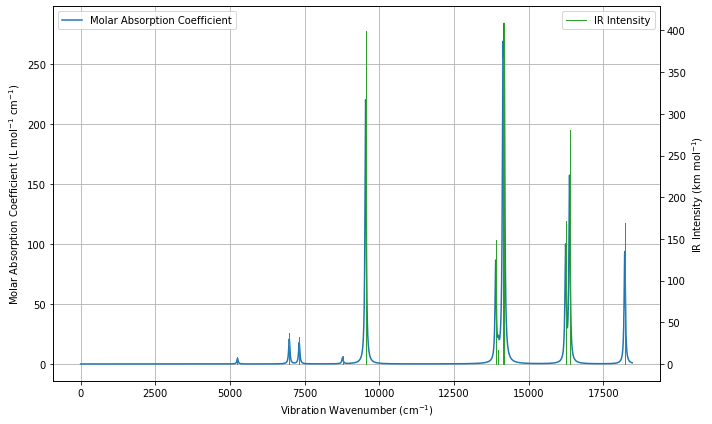

In [128]:
from pyscf import gto, dft
from pyscf.prop.infrared.rhf import Infrared

mf_ir = Infrared(mf).run()
mf_ir.plot_ir()